## Dataset Overview

### Contains data about various ski resorts in Europe.
###### Unnamed: 0: An index column.
###### Resort: Name of the ski resort.
###### Country: Country where the resort is located.
###### HighestPoint: The highest point of the resort in meters.
###### LowestPoint: The lowest point of the resort in meters.
###### DayPassPriceAdult: Price of an adult day pass in Euros.
###### BeginnerSlope: Length of beginner slopes in kilometers.
###### IntermediateSlope: Length of intermediate slopes in kilometers.
###### DifficultSlope: Length of difficult slopes in kilometers.
###### TotalSlope: Total length of slopes in kilometers.
###### Snowparks: Availability of snowparks (Yes/No).
###### NightSki: Availability of night skiing (Yes/No).
###### SurfaceLifts: Number of surface lifts.
###### ChairLifts: Number of chairlifts.
###### GondolaLifts: Number of gondola lifts.
###### TotalLifts: Total number of lifts.
###### LiftCapacity: Lift capacity per hour.
###### SnowCannons: Number of snow cannons.

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D

# Load the CSV file
file_path = 'data/European_Ski_Resorts.csv'
ski_resorts_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
ski_resorts_data.head()


Unnamed: 0                                             Resort  \
0           1                              Alpendorf (Ski amedé)   
1           2  Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...   
2           3                              Oberau (Wildschönau)   
3           4                                     Dachstein West   
4           5                                        Rosa Khutor   

           Country  HighestPoint  LowestPoint  DayPassPriceAdult  \
0          Austria          1980          740                 52   
1          Andorra          2640         1710                 47   
2          Austria          1130          900                 30   
3          Austria          1620          780                 42   
4  Southern Russia          2320          940                 22   

   BeginnerSlope  IntermediateSlope  DifficultSlope  TotalSlope Snowparks  \
0             30                 81               4         115       Yes   
1            100                 77              33         210       Yes   
2              1                  0               1           2        No   
3             15                 33               3          51       Yes   
4             30                 26              21          77       Yes   

  NightSki  SurfaceLifts  ChairLifts  GondolaLifts  TotalLifts  LiftCapacity  \
0       No            22          16            11          49         75398   
1      Yes            37          28             7          72         99017   
2       No             2           0             0           2          1932   
3      Yes            25           8             3          36         32938   
4       No             6          11            10          27         49228   

   SnowCannons  
0          600  
1         1032  
2            0  
3          163  
4          450

In [5]:
# checking Dtypes and nulls.
ski_resorts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         376 non-null    int64 
 1   Resort             376 non-null    object
 2   Country            376 non-null    object
 3   HighestPoint       376 non-null    int64 
 4   LowestPoint        376 non-null    int64 
 5   DayPassPriceAdult  376 non-null    int64 
 6   BeginnerSlope      376 non-null    int64 
 7   IntermediateSlope  376 non-null    int64 
 8   DifficultSlope     376 non-null    int64 
 9   TotalSlope         376 non-null    int64 
 10  Snowparks          376 non-null    object
 11  NightSki           376 non-null    object
 12  SurfaceLifts       376 non-null    int64 
 13  ChairLifts         376 non-null    int64 
 14  GondolaLifts       376 non-null    int64 
 15  TotalLifts         376 non-null    int64 
 16  LiftCapacity       376 non-null    int64 
 1

# Numerical Data

In [8]:

# Basic statistics for numerical columns
ski_resorts_data.describe()


Unnamed: 0  HighestPoint  LowestPoint  DayPassPriceAdult  \
count  376.000000    376.000000   376.000000         376.000000   
mean   188.500000   2051.688830  1055.098404          40.779255   
std    108.686092    776.719908   423.604310          12.474259   
min      1.000000      0.000000     0.000000           0.000000   
25%     94.750000   1550.000000   779.250000          34.000000   
50%    188.500000   2104.000000  1050.000000          42.000000   
75%    282.250000   2567.500000  1350.000000          49.000000   
max    376.000000   3899.000000  2180.000000          81.000000   

       BeginnerSlope  IntermediateSlope  DifficultSlope  TotalSlope  \
count     376.000000         376.000000      376.000000  376.000000   
mean       35.869681          38.348404       11.776596   86.257979   
std        53.719832          49.691136       17.785780  113.740218   
min         0.000000           0.000000        0.000000    0.000000   
25%         8.000000           9.000000        2.000000   25.000000   
50%        19.000000          22.000000        5.000000   48.000000   
75%        40.000000          42.250000       13.000000  100.000000   
max       312.000000         239.000000      103.000000  600.000000   

       SurfaceLifts  ChairLifts  GondolaLifts  TotalLifts   LiftCapacity  \
count    376.000000  376.000000    376.000000  376.000000     376.000000   
mean      13.662234    9.340426      3.954787   26.957447   34727.244681   
std       14.438661   12.595282      6.565411   31.038957   45955.042689   
min        0.000000    0.000000      0.000000    0.000000       0.000000   
25%        5.000000    2.000000      0.000000   10.000000   10642.500000   
50%        9.000000    5.000000      2.000000   17.000000   19031.500000   
75%       17.000000   10.000000      5.000000   29.250000   36555.500000   
max       89.000000   74.000000     40.000000  174.000000  252280.000000   

       SnowCannons  
count   376.000000  
mean    218.361702  
std     406.903529  
min       0.000000  
25%       0.000000  
50%      54.000000  
75%     252.000000  
max    2383.000000

## Numerical Data Summary
#### 1. HighestPoint: The average highest point of the resorts is about 2052 meters with the max being 3899.
#### 2. Lowest Point: The average lowest point is at 1055 meters.
#### 3. DayPassPrice(Adult): The average day pass price for adults is approximately 40.7 euros with the max being 81.
#### 4. Slope Lengths:  On average, resorts have about 35.87 km of beginner slopes, 38.35 km of intermediate slopes, and 11.78 km of difficult slopes. The total slope length averages around 86.26 km.
#### 5. Lifts: The average number of total lifts in a resort is around 27, with an average lift capacity of 34,727 per hour.
#### 6. Snow Cannon: Resort have an average of 218 snow cannons.

### Univariate Analysis of categorical variables.


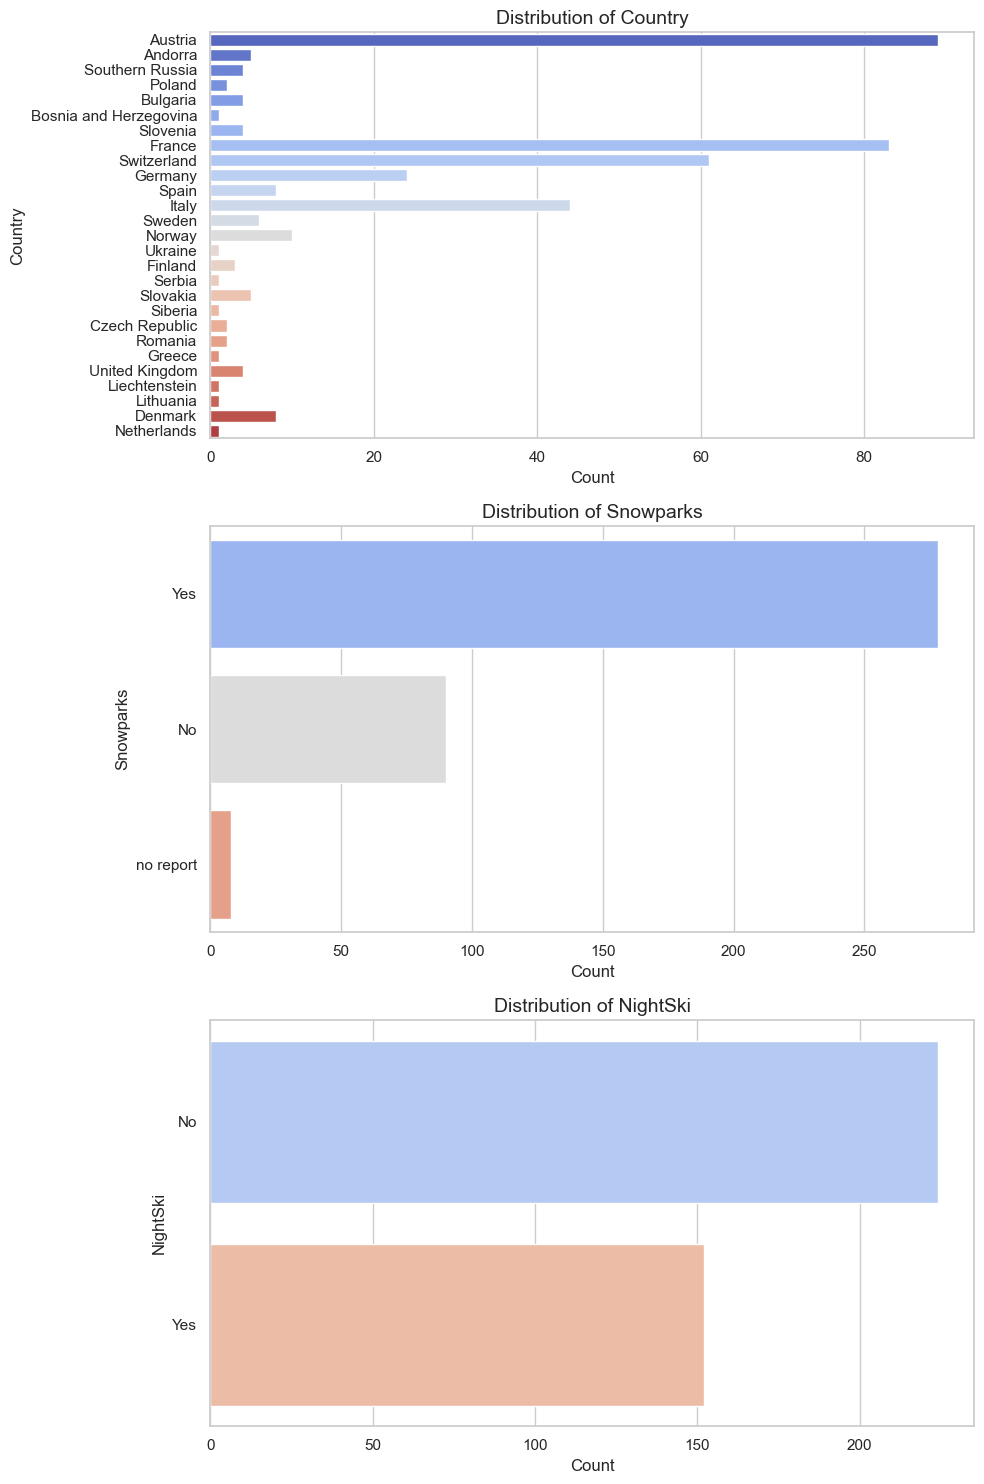

In [12]:
# Univariate Analysis: Categorical variables
categorical_columns = ['Country', 'Snowparks', 'NightSki']

# Plotting distributions of categorical variables
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 15))

for i, col in enumerate(categorical_columns):
    sns.countplot(y=ski_resorts_data[col], ax=axes[i], palette="coolwarm")
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


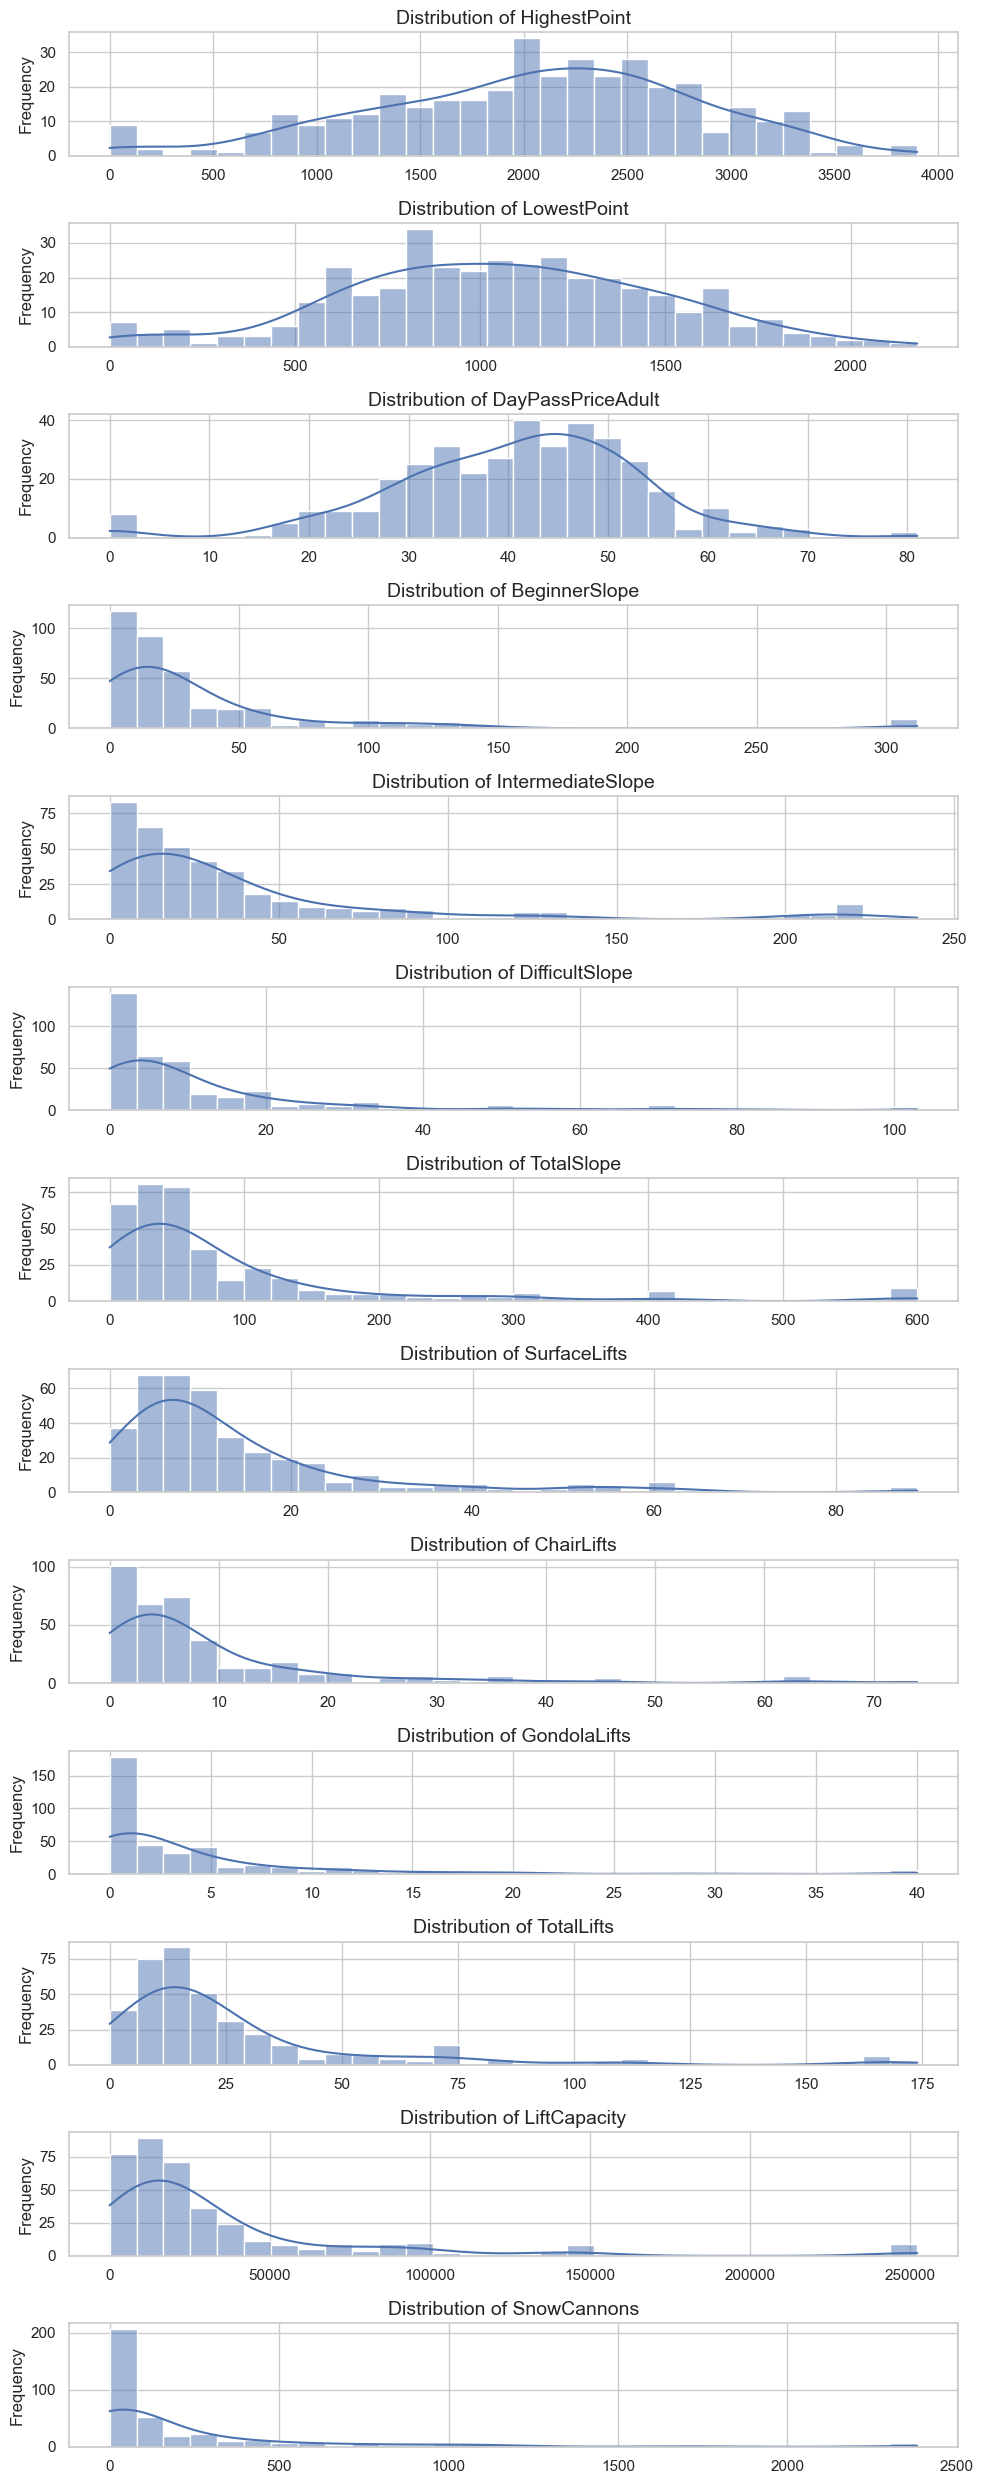

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
sns.set(style="whitegrid")

# Univariate Analysis: Numeric variables
numeric_columns = ['HighestPoint', 'LowestPoint', 'DayPassPriceAdult', 
                   'BeginnerSlope', 'IntermediateSlope', 'DifficultSlope', 
                   'TotalSlope', 'SurfaceLifts', 'ChairLifts', 'GondolaLifts', 
                   'TotalLifts', 'LiftCapacity', 'SnowCannons']

# Plotting distributions of numeric variables
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 25))

for i, col in enumerate(numeric_columns):
    sns.histplot(ski_resorts_data[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [15]:
# Calculating the skewness of numeric variables
skewness = ski_resorts_data[numeric_columns].skew()
skewness


HighestPoint        -0.341316
LowestPoint         -0.075609
DayPassPriceAdult   -0.505224
BeginnerSlope        3.520913
IntermediateSlope    2.418324
DifficultSlope       2.968581
TotalSlope           2.775542
SurfaceLifts         2.440496
ChairLifts           2.877420
GondolaLifts         3.348735
TotalLifts           2.798421
LiftCapacity         2.992235
SnowCannons          3.241244
dtype: float64

### HighestPoint & LowestPoint: These variables appear to have a wide range of values, indicating variability in the altitudes of the ski resorts.

#### DayPassPriceAdult: The distribution of day pass prices for adults is right-skewed, meaning most resorts have lower prices, with fewer resorts having higher prices.

#### Slope Lengths (Beginner, Intermediate, Difficult, Total): All slope length variables exhibit right-skewed distributions. This indicates that most resorts have shorter slopes, with a few resorts having much longer slopes.

#### Lifts (Surface, Chair, Gondola, Total): The number of lifts (of all types) at resorts also shows right-skewed distributions. Most resorts have a smaller number of lifts, with fewer resorts having a large number of lifts.

#### LiftCapacity & SnowCannons: These variables are similarly right-skewed, indicating that while most resorts have lower capacities and fewer snow cannons, some resorts are equipped with significantly higher capacities and more snow cannons.

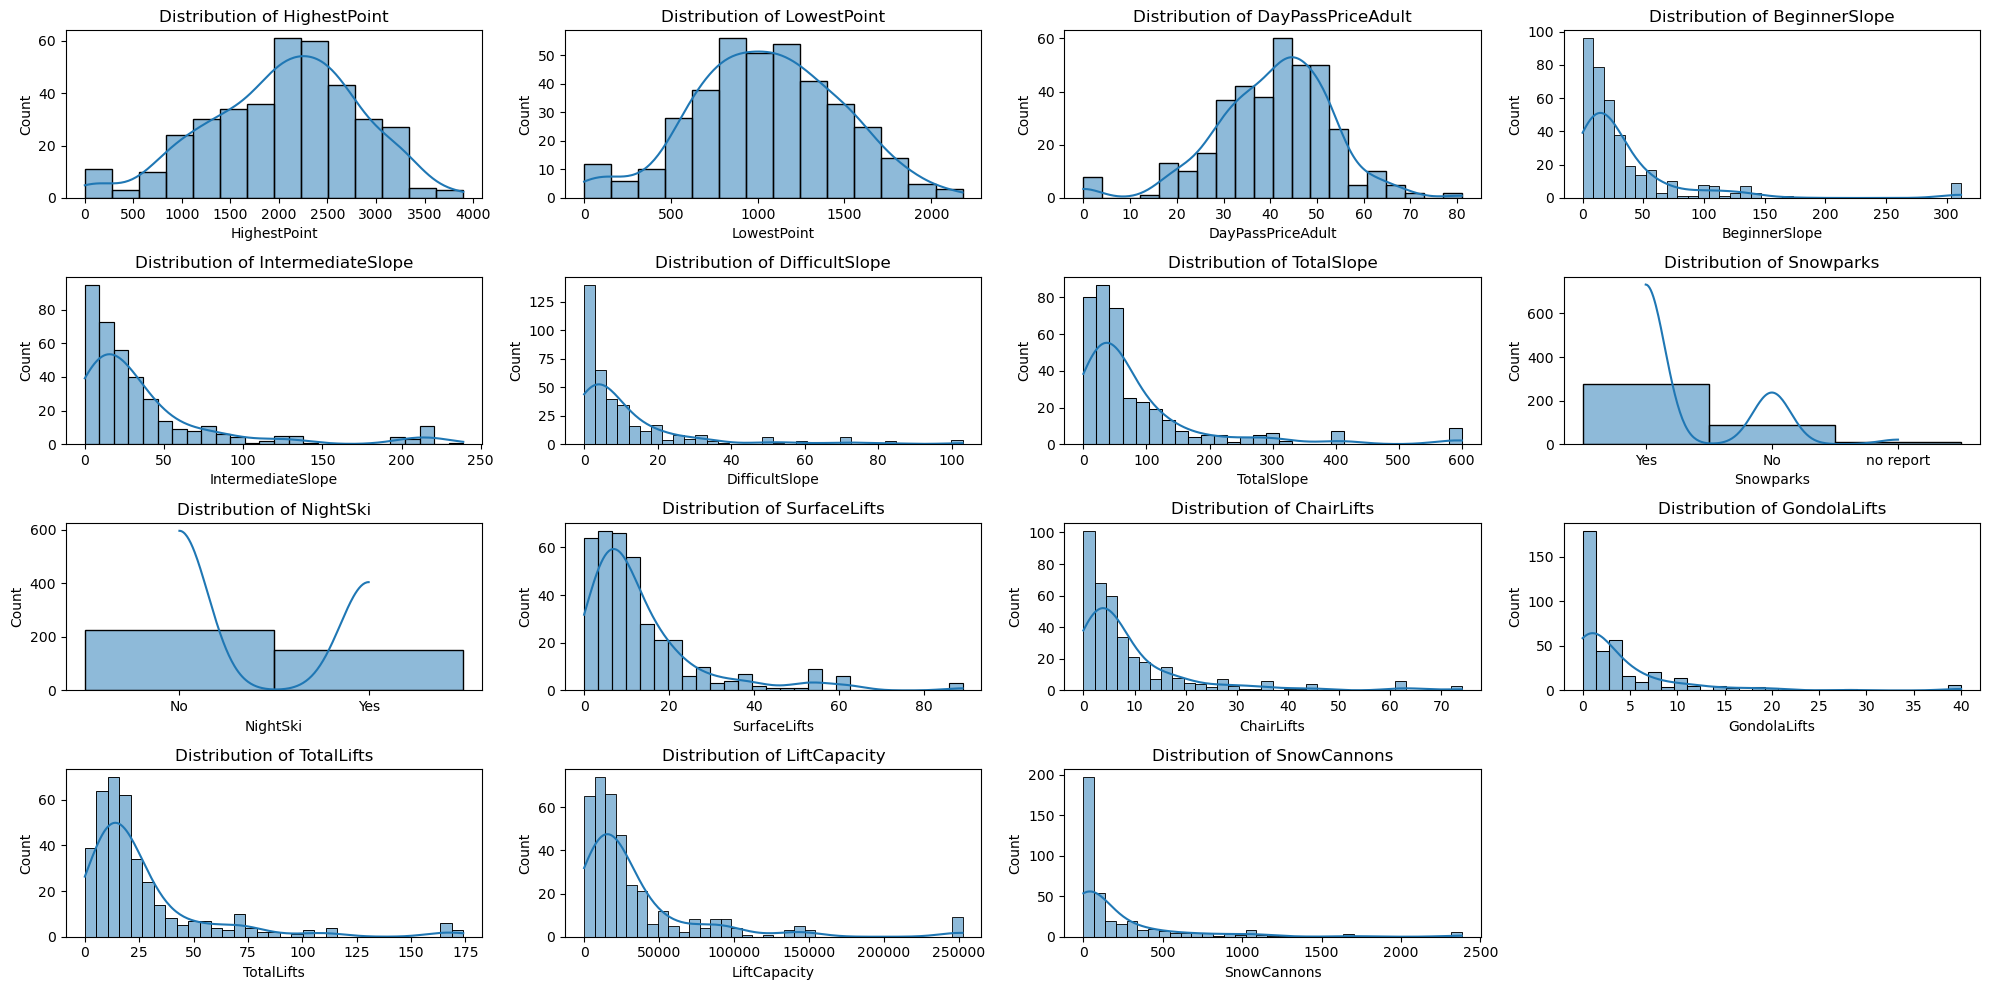

In [7]:
# Selecting a few key numerical features for distribution plots
features_to_plot = ['HighestPoint', 'LowestPoint',
       'DayPassPriceAdult', 'BeginnerSlope', 'IntermediateSlope',
       'DifficultSlope', 'TotalSlope', 'Snowparks', 'NightSki', 'SurfaceLifts',
       'ChairLifts', 'GondolaLifts', 'TotalLifts', 'LiftCapacity',
       'SnowCannons']

# Creating distribution plots
plt.figure(figsize=(20, 10))

for i, feature in enumerate(features_to_plot):
    plt.subplot(4, 4, i + 1)
    sns.histplot(ski_resorts_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

## Visual Analysis
### Day Pass Prices: The distribution shows a concentration around €40-€50, indicating this as a common price range for adult day passes.
### Total Slope Length: The distribution is right-skewed, with most resorts having total slope lengths below 100 km.
### Lift Capacity: This is also right-skewed, suggesting most resorts have a moderate lift capacity.
### Snow Cannons: Many resorts have a low to moderate number of snow cannons, with a few exceptions having significantly more.

# Bi-Variate Data Analysis

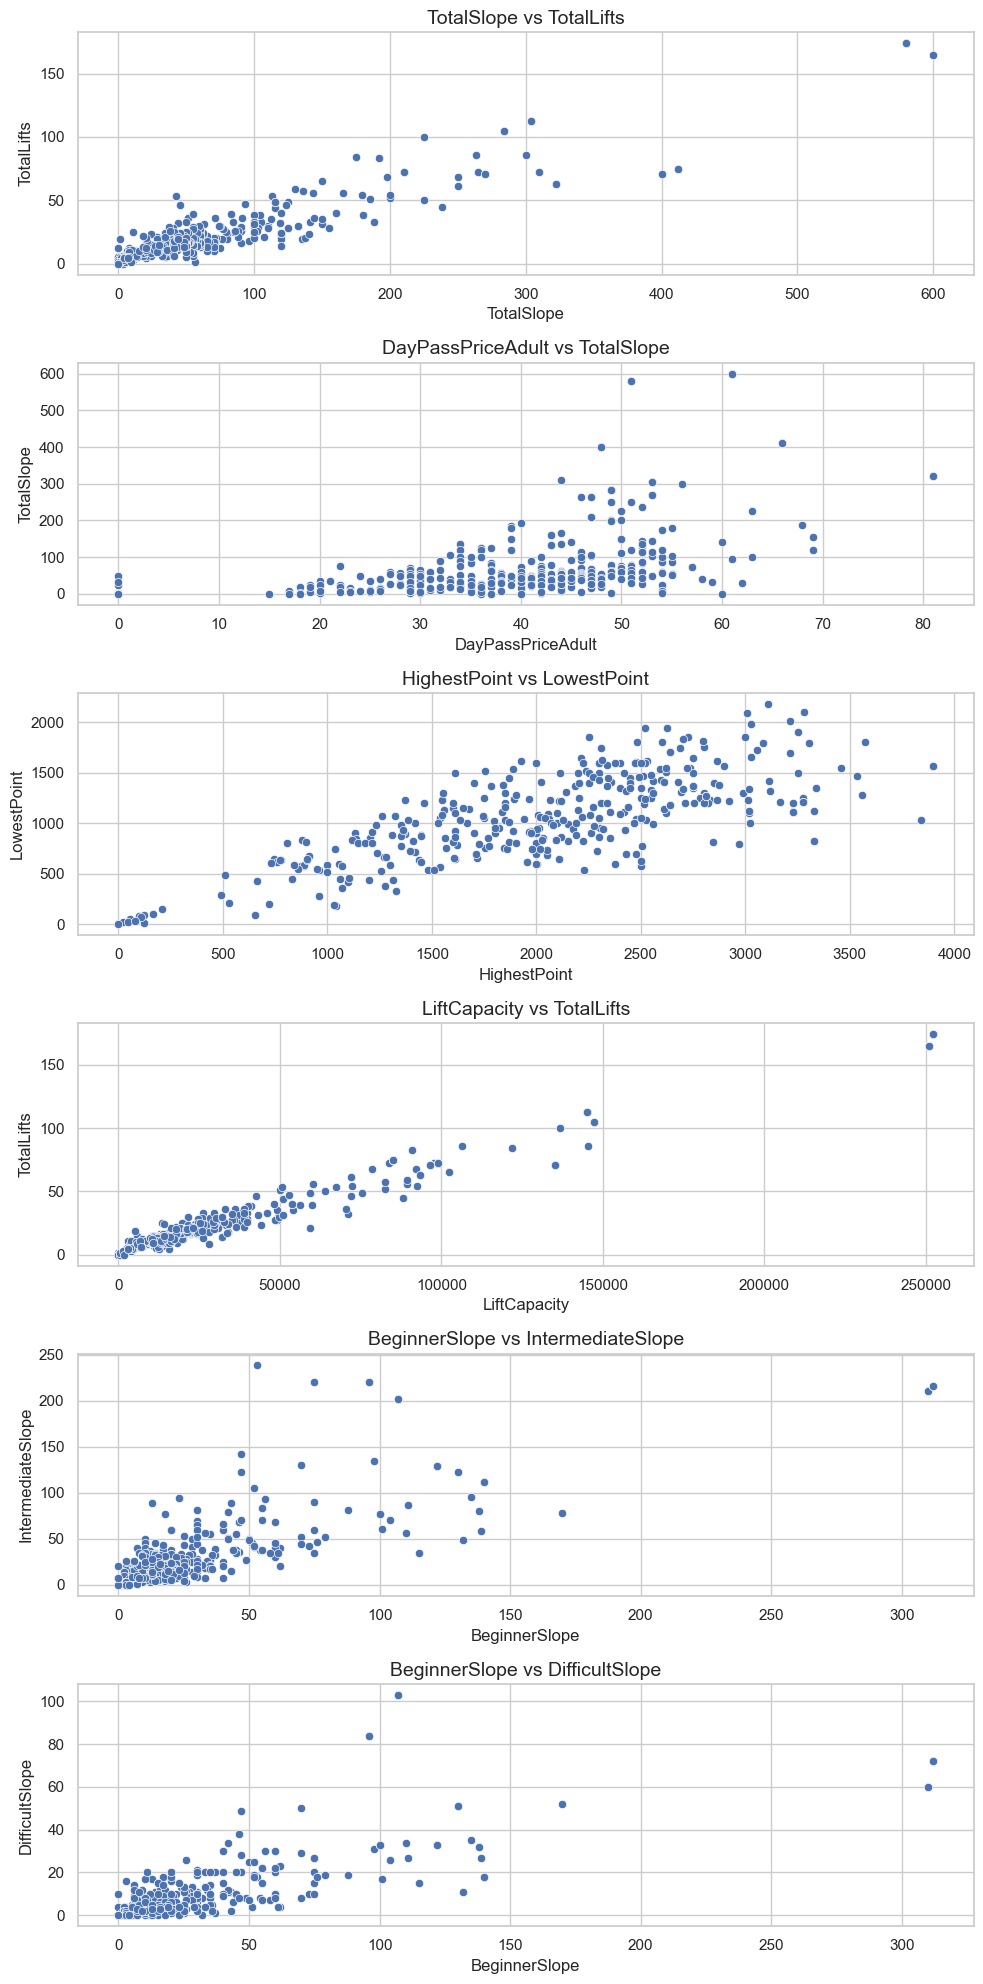

In [10]:
# Bivariate Analysis: Examining relationships between key pairs of variables

# Selecting some key variables for bivariate analysis
key_pairs = [
    ('TotalSlope', 'TotalLifts'), 
    ('DayPassPriceAdult', 'TotalSlope'), 
    ('HighestPoint', 'LowestPoint'),
    ('LiftCapacity', 'TotalLifts'),
    ('BeginnerSlope', 'IntermediateSlope'),
    ('BeginnerSlope', 'DifficultSlope')
]

# Plotting scatter plots for these pairs
fig, axes = plt.subplots(nrows=len(key_pairs), ncols=1, figsize=(10, 20))

for i, (x, y) in enumerate(key_pairs):
    sns.scatterplot(data=ski_resorts_data, x=x, y=y, ax=axes[i])
    axes[i].set_title(f'{x} vs {y}', fontsize=14)
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)

plt.tight_layout()
plt.show()


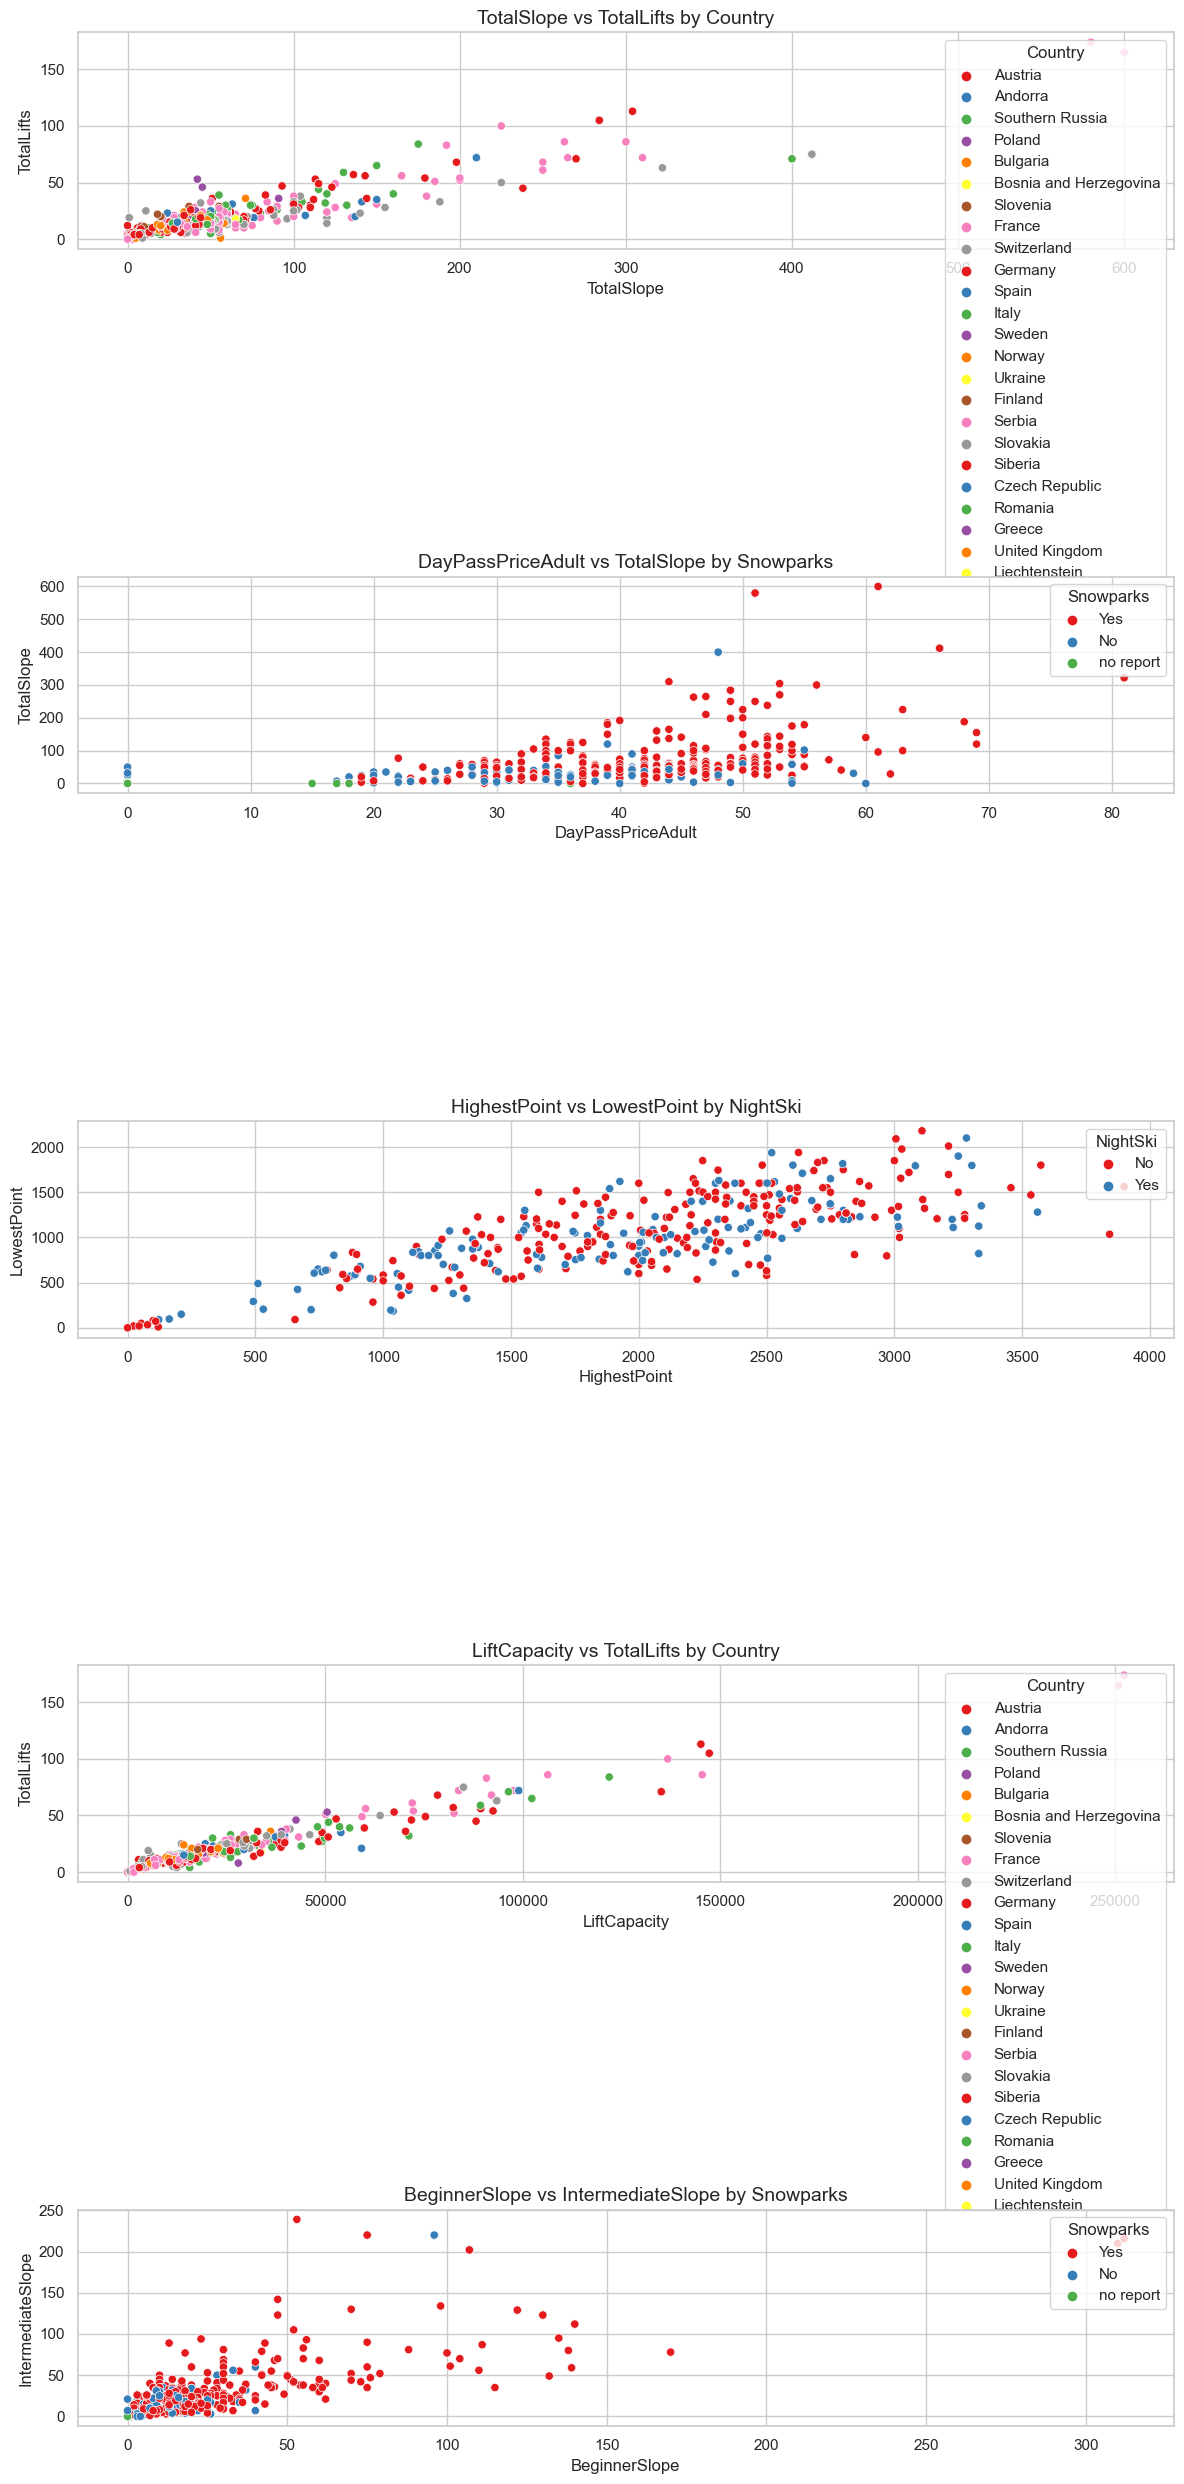

In [16]:
# Bivariate Analysis with 'hue' for more in-depth insights

# Selecting some combinations of variables for bivariate analysis with 'hue'
hue_combinations = [
    ('TotalSlope', 'TotalLifts', 'Country'),
    ('DayPassPriceAdult', 'TotalSlope', 'Snowparks'),
    ('HighestPoint', 'LowestPoint', 'NightSki'),
    ('LiftCapacity', 'TotalLifts', 'Country'),
    ('BeginnerSlope', 'IntermediateSlope', 'Snowparks')
]

# Plotting scatter plots for these combinations
fig, axes = plt.subplots(nrows=len(hue_combinations), ncols=1, figsize=(12, 25))

for i, (x, y, hue) in enumerate(hue_combinations):
    sns.scatterplot(data=ski_resorts_data, x=x, y=y, hue=hue, ax=axes[i], palette='Set1')
    axes[i].set_title(f'{x} vs {y} by {hue}', fontsize=14)
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    axes[i].legend(title=hue, loc='upper right')

plt.tight_layout()
plt.show()


### Total Slope vs. Total Lifts by Country: This plot shows how the relationship between the total length of slopes and the number of lifts varies across different countries. It can be useful for understanding country-specific trends in ski resort features.

### Day Pass Price vs. Total Slope by Snowparks: This chart illustrates whether the availability of snowparks affects the relationship between day pass prices and the total slope length. It provides insights into how additional amenities like snowparks might influence pricing and facilities.

### Highest Point vs. Lowest Point by Night Ski: This plot examines how the elevation range of ski resorts relates to the availability of night skiing. It can reveal if resorts with certain elevation profiles are more likely to offer night skiing.

### Lift Capacity vs. Total Lifts by Country: Here, we can see how the relationship between lift capacity and the total number of lifts varies in different countries. This can highlight country-specific characteristics in terms of resort capacities.

### Beginner Slope vs. Intermediate Slope by Snowparks: This plot shows the relationship between the lengths of beginner and intermediate slopes and how this relationship is influenced by the presence of snowparks. It may indicate if resorts with snowparks tend to have longer slopes for different skill levels.

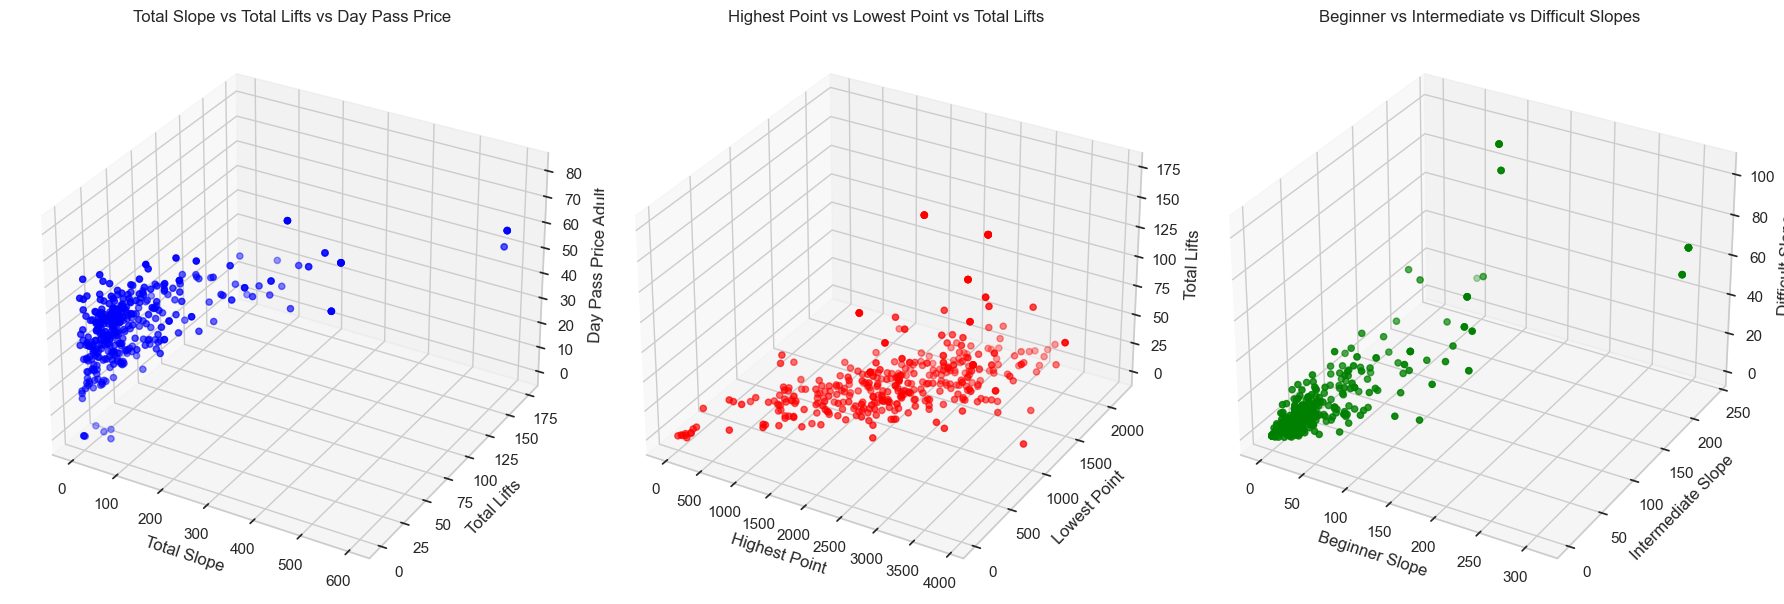

In [18]:
# Preparing data for 3D plots
plot_data1 = ski_resorts_data[['TotalSlope', 'TotalLifts', 'DayPassPriceAdult']]
plot_data2 = ski_resorts_data[['HighestPoint', 'LowestPoint', 'TotalLifts']]
plot_data3 = ski_resorts_data[['BeginnerSlope', 'IntermediateSlope', 'DifficultSlope']]

# Creating 3D plots
fig = plt.figure(figsize=(18, 6))

# 3D Plot 1: Total Slope vs Total Lifts vs Day Pass Price
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(plot_data1['TotalSlope'], plot_data1['TotalLifts'], plot_data1['DayPassPriceAdult'], c='blue', marker='o')
ax1.set_xlabel('Total Slope')
ax1.set_ylabel('Total Lifts')
ax1.set_zlabel('Day Pass Price Adult')
ax1.set_title('Total Slope vs Total Lifts vs Day Pass Price')

# 3D Plot 2: Highest Point vs Lowest Point vs Total Lifts
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(plot_data2['HighestPoint'], plot_data2['LowestPoint'], plot_data2['TotalLifts'], c='red', marker='o')
ax2.set_xlabel('Highest Point')
ax2.set_ylabel('Lowest Point')
ax2.set_zlabel('Total Lifts')
ax2.set_title('Highest Point vs Lowest Point vs Total Lifts')

# 3D Plot 3: Beginner vs Intermediate vs Difficult Slopes
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(plot_data3['BeginnerSlope'], plot_data3['IntermediateSlope'], plot_data3['DifficultSlope'], c='green', marker='o')
ax3.set_xlabel('Beginner Slope')
ax3.set_ylabel('Intermediate Slope')
ax3.set_zlabel('Difficult Slope')
ax3.set_title('Beginner vs Intermediate vs Difficult Slopes')

plt.tight_layout()
plt.show()


## Categorical Analysis

In [13]:
# Count of unique values for categorical columns
country_count = ski_resorts_data['Country'].value_counts()
snowparks_count = ski_resorts_data['Snowparks'].value_counts()
nightski_count = ski_resorts_data['NightSki'].value_counts()


<BarContainer object of 27 artists>

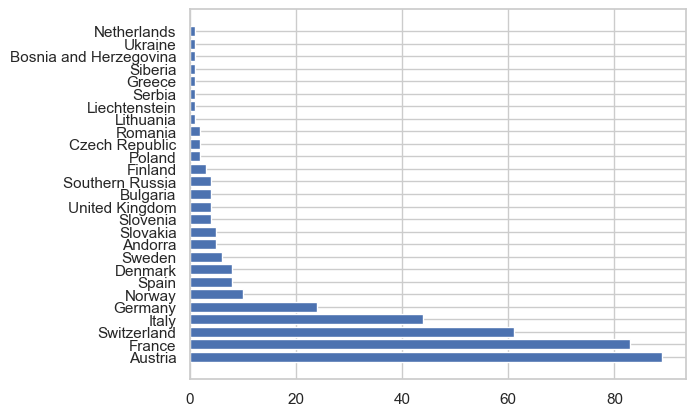

In [14]:
plt.barh(country_count.index,country_count.values)

<BarContainer object of 3 artists>

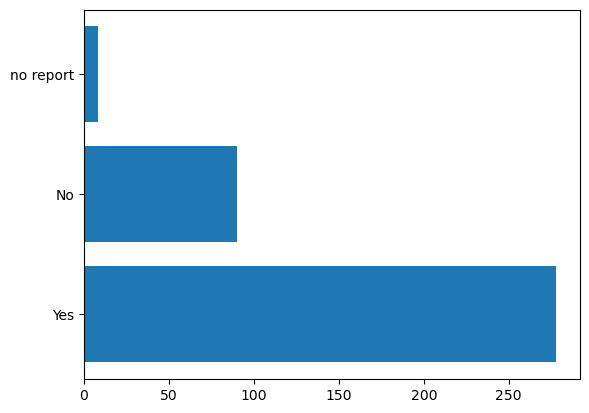

In [20]:
plt.barh(snowparks_count.index,snowparks_count.values)

<BarContainer object of 2 artists>

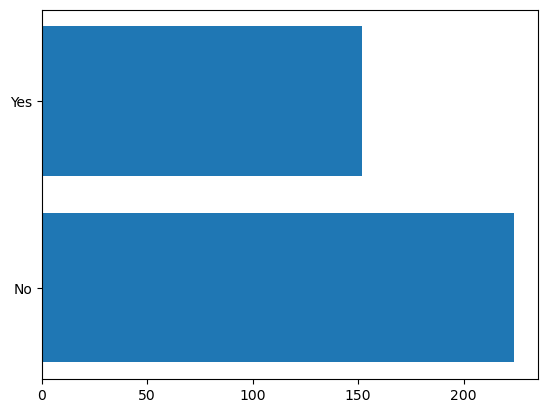

In [21]:
plt.barh(nightski_count.index,nightski_count.values)

# Categorical Data Summary
##### 1. Countries: Austria (89 resorts), France (83), and Switzerland (61) have the highest number of ski resorts in the dataset.
##### 2. Snowparks: 278 resorts have snowparks, while 90 do not.
##### 3. Night Skiing: 152 resorts offer night skiing, whereas 224 do not.

In [23]:
# Grabbing columns to create histograms.
ski_resorts_data.columns

Index(['Unnamed: 0', 'Resort', 'Country', 'HighestPoint', 'LowestPoint',
       'DayPassPriceAdult', 'BeginnerSlope', 'IntermediateSlope',
       'DifficultSlope', 'TotalSlope', 'Snowparks', 'NightSki', 'SurfaceLifts',
       'ChairLifts', 'GondolaLifts', 'TotalLifts', 'LiftCapacity',
       'SnowCannons'],
      dtype='object')

## There's alot of right skewed data would any transformations help (MAE,RMAE,R2) scores ?

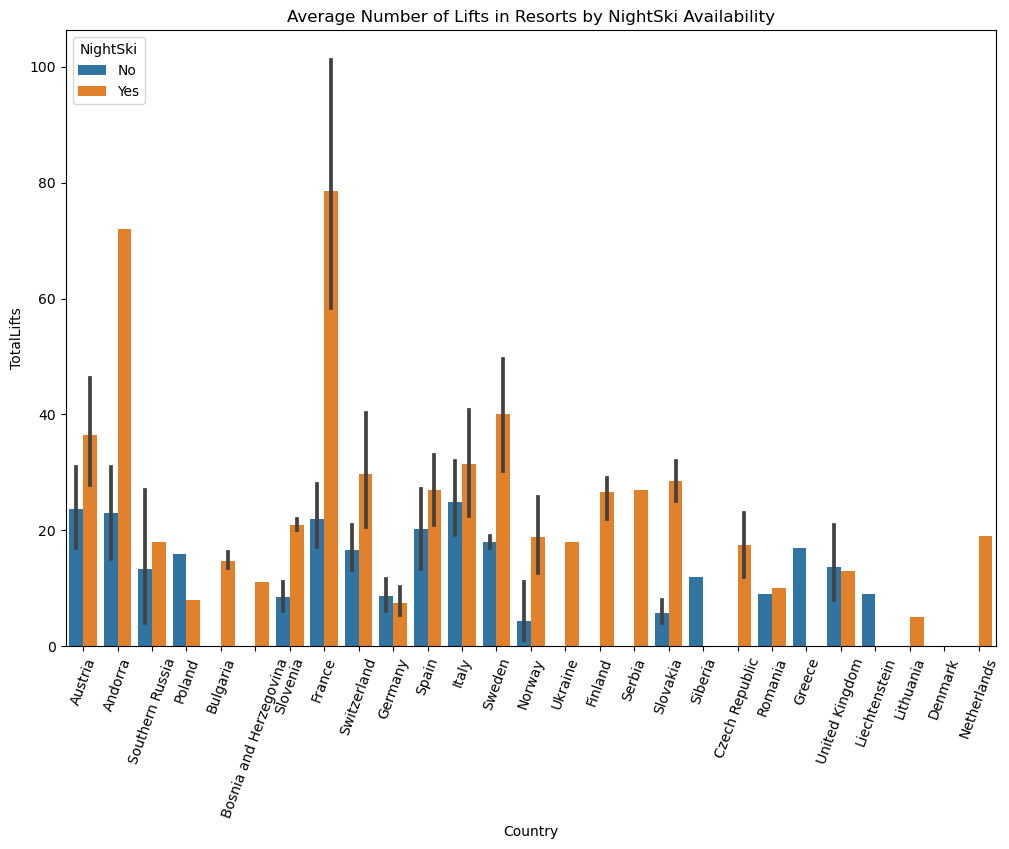

In [69]:
plt.figure(figsize=(12,8))
sns.barplot(data=ski_resorts_data, x='Country', y='TotalLifts', hue='NightSki')
plt.xticks(rotation=70)
plt.title('Average Number of Lifts in Resorts by NightSki Availability')
plt.show()


### They are error bars. They can display either confidence intervals or the standard deviation.

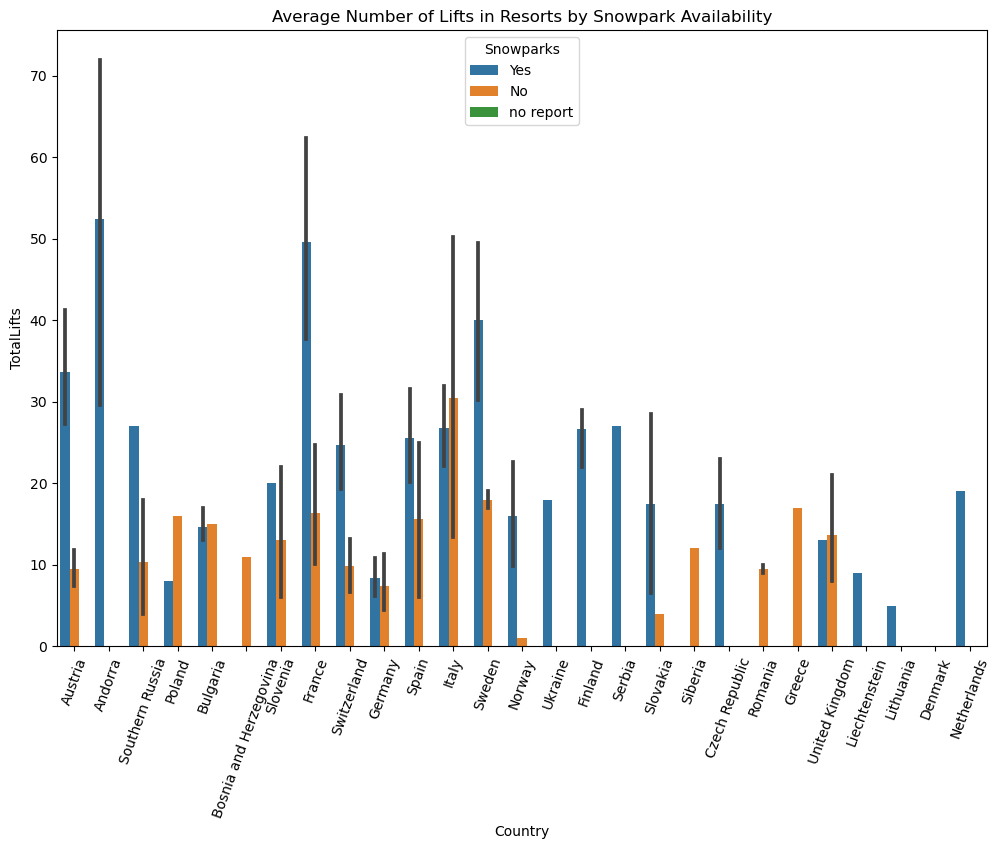

In [68]:
plt.figure(figsize=(12,8))
sns.barplot(data=ski_resorts_data, x='Country', y='TotalLifts', hue='Snowparks')
plt.xticks(rotation=70)
plt.title('Average Number of Lifts in Resorts by Snowpark Availability')
plt.show()


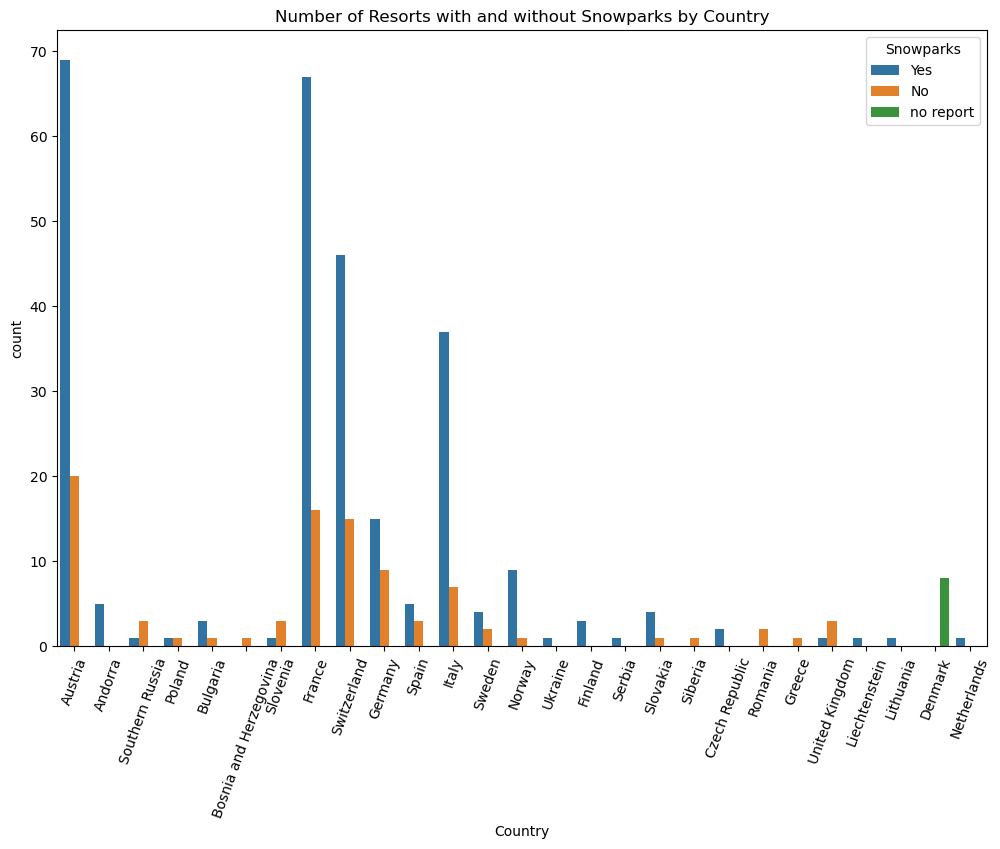

In [67]:
plt.figure(figsize=(12,8))
sns.countplot(data=ski_resorts_data, x='Country', hue='Snowparks')
plt.xticks(rotation=70)
plt.title('Number of Resorts with and without Snowparks by Country')
plt.show()


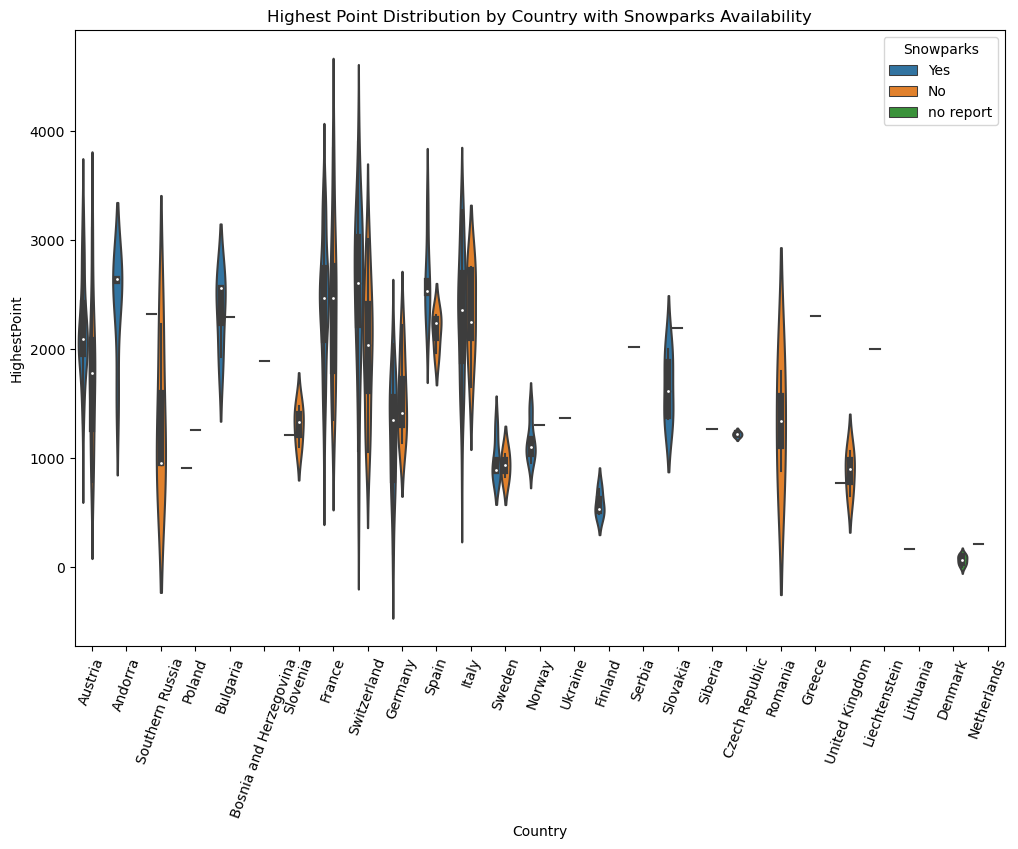

In [66]:
plt.figure(figsize=(12,8))
sns.violinplot(data=ski_resorts_data, x='Country', y='HighestPoint', hue='Snowparks')
plt.xticks(rotation=70)
plt.title('Highest Point Distribution by Country with Snowparks Availability')
plt.show()


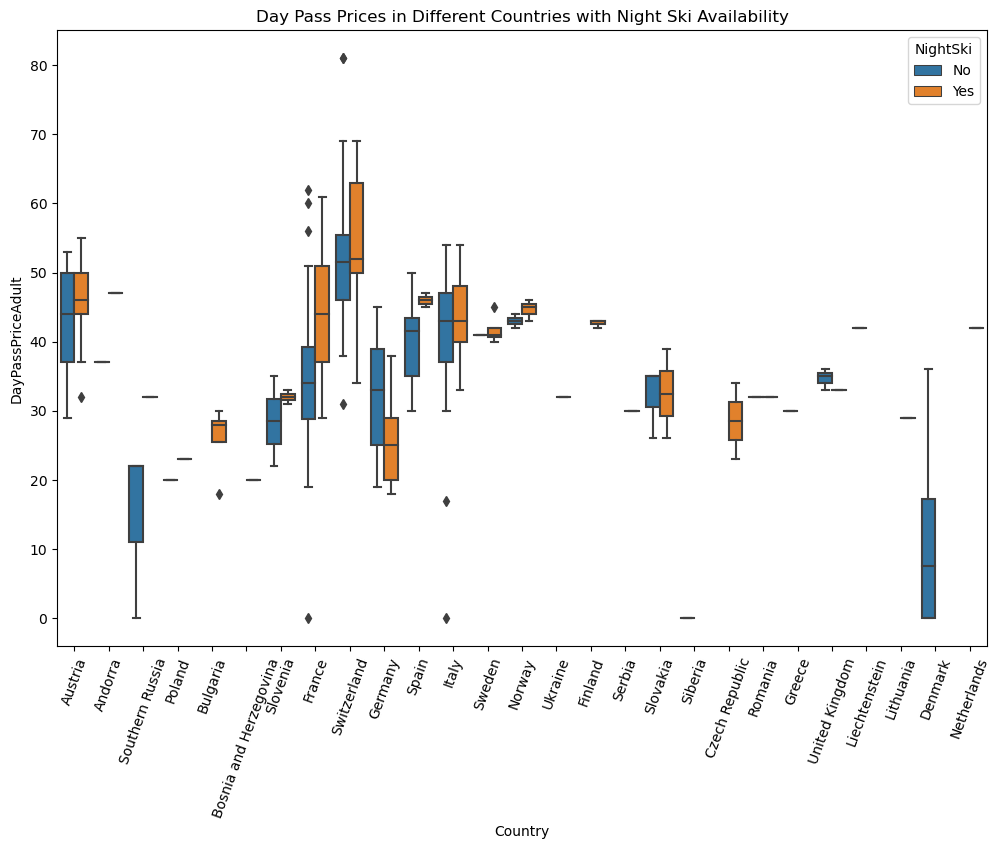

In [65]:
plt.figure(figsize=(12,8))
sns.boxplot(data=ski_resorts_data, x='Country', y='DayPassPriceAdult', hue='NightSki')
plt.xticks(rotation=70)
plt.title('Day Pass Prices in Different Countries with Night Ski Availability')
plt.show()


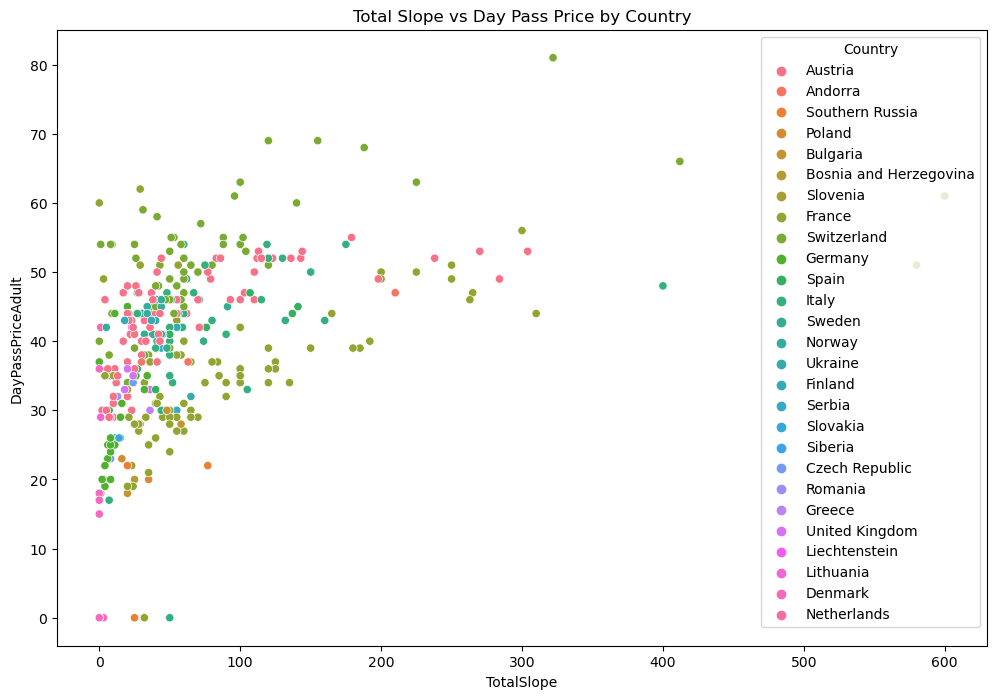

In [70]:
# Example: Relationship between 'TotalSlope' and 'DayPassPriceAdult' differentiated by 'Country'
plt.figure(figsize=(12,8))
sns.scatterplot(data=ski_resorts_data, x='TotalSlope', y='DayPassPriceAdult', hue='Country')
plt.title('Total Slope vs Day Pass Price by Country')
plt.show()


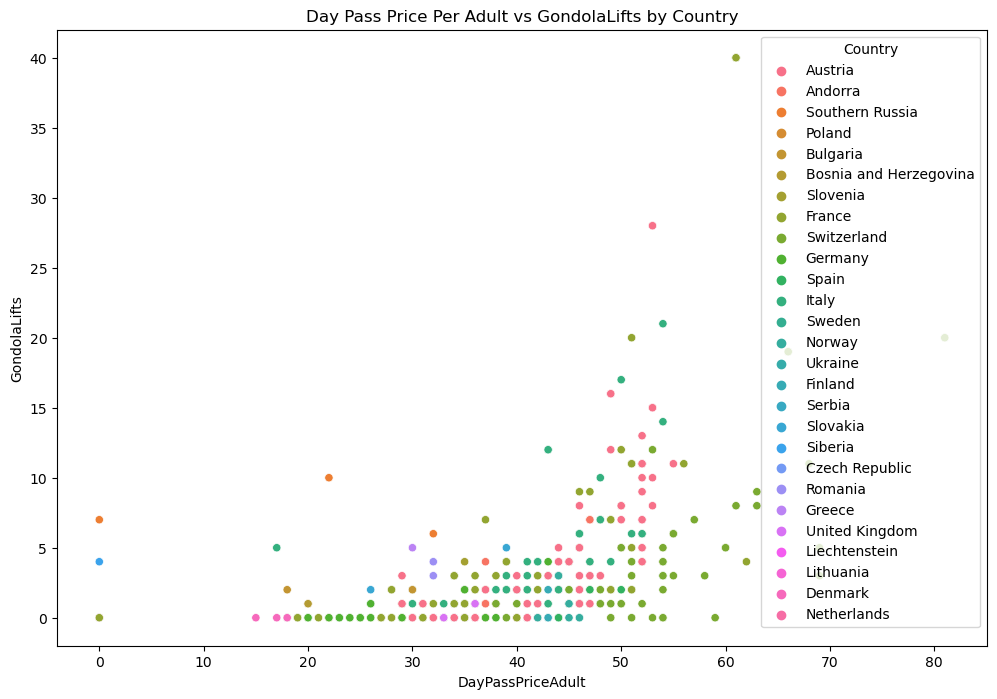

In [72]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=ski_resorts_data, x='DayPassPriceAdult', y='GondolaLifts', hue='Country')
plt.title('Day Pass Price Per Adult vs GondolaLifts by Country')
plt.show()


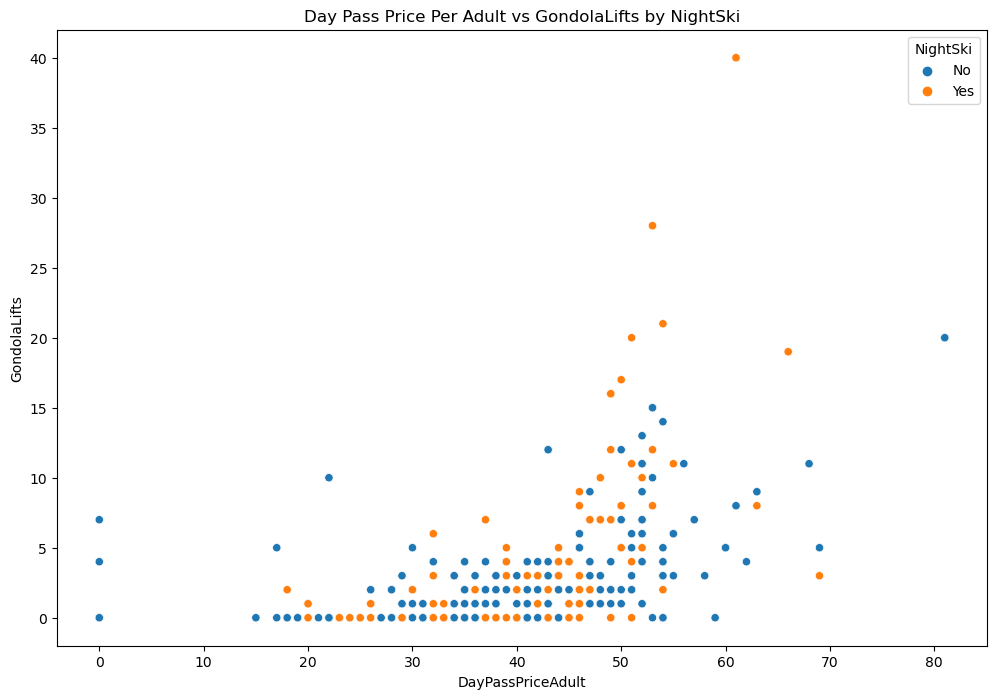

In [74]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=ski_resorts_data, x='DayPassPriceAdult', y='GondolaLifts', hue='NightSki')
plt.title('Day Pass Price Per Adult vs GondolaLifts by NightSki')
plt.show()

# Visual Analysis
#### * Day Pass Prices: The distribution shows a concentration around €40-€50, indicating this as a common price range for adult day passes. 
#### * Total Slope Length: The distribution is right-skewed, with most resorts having total slope lengths below 100 km.
#### * Lift Capacity: This is also right-skewed, suggesting most resorts have a moderate lift capacity.
#### * Snow Cannons: Many resorts have a low to moderate number of snow cannons, with a few exceptions having significantly more.
#### * Daypass prices in certain countries have serious outliers.

/Users/madisonavemoe/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


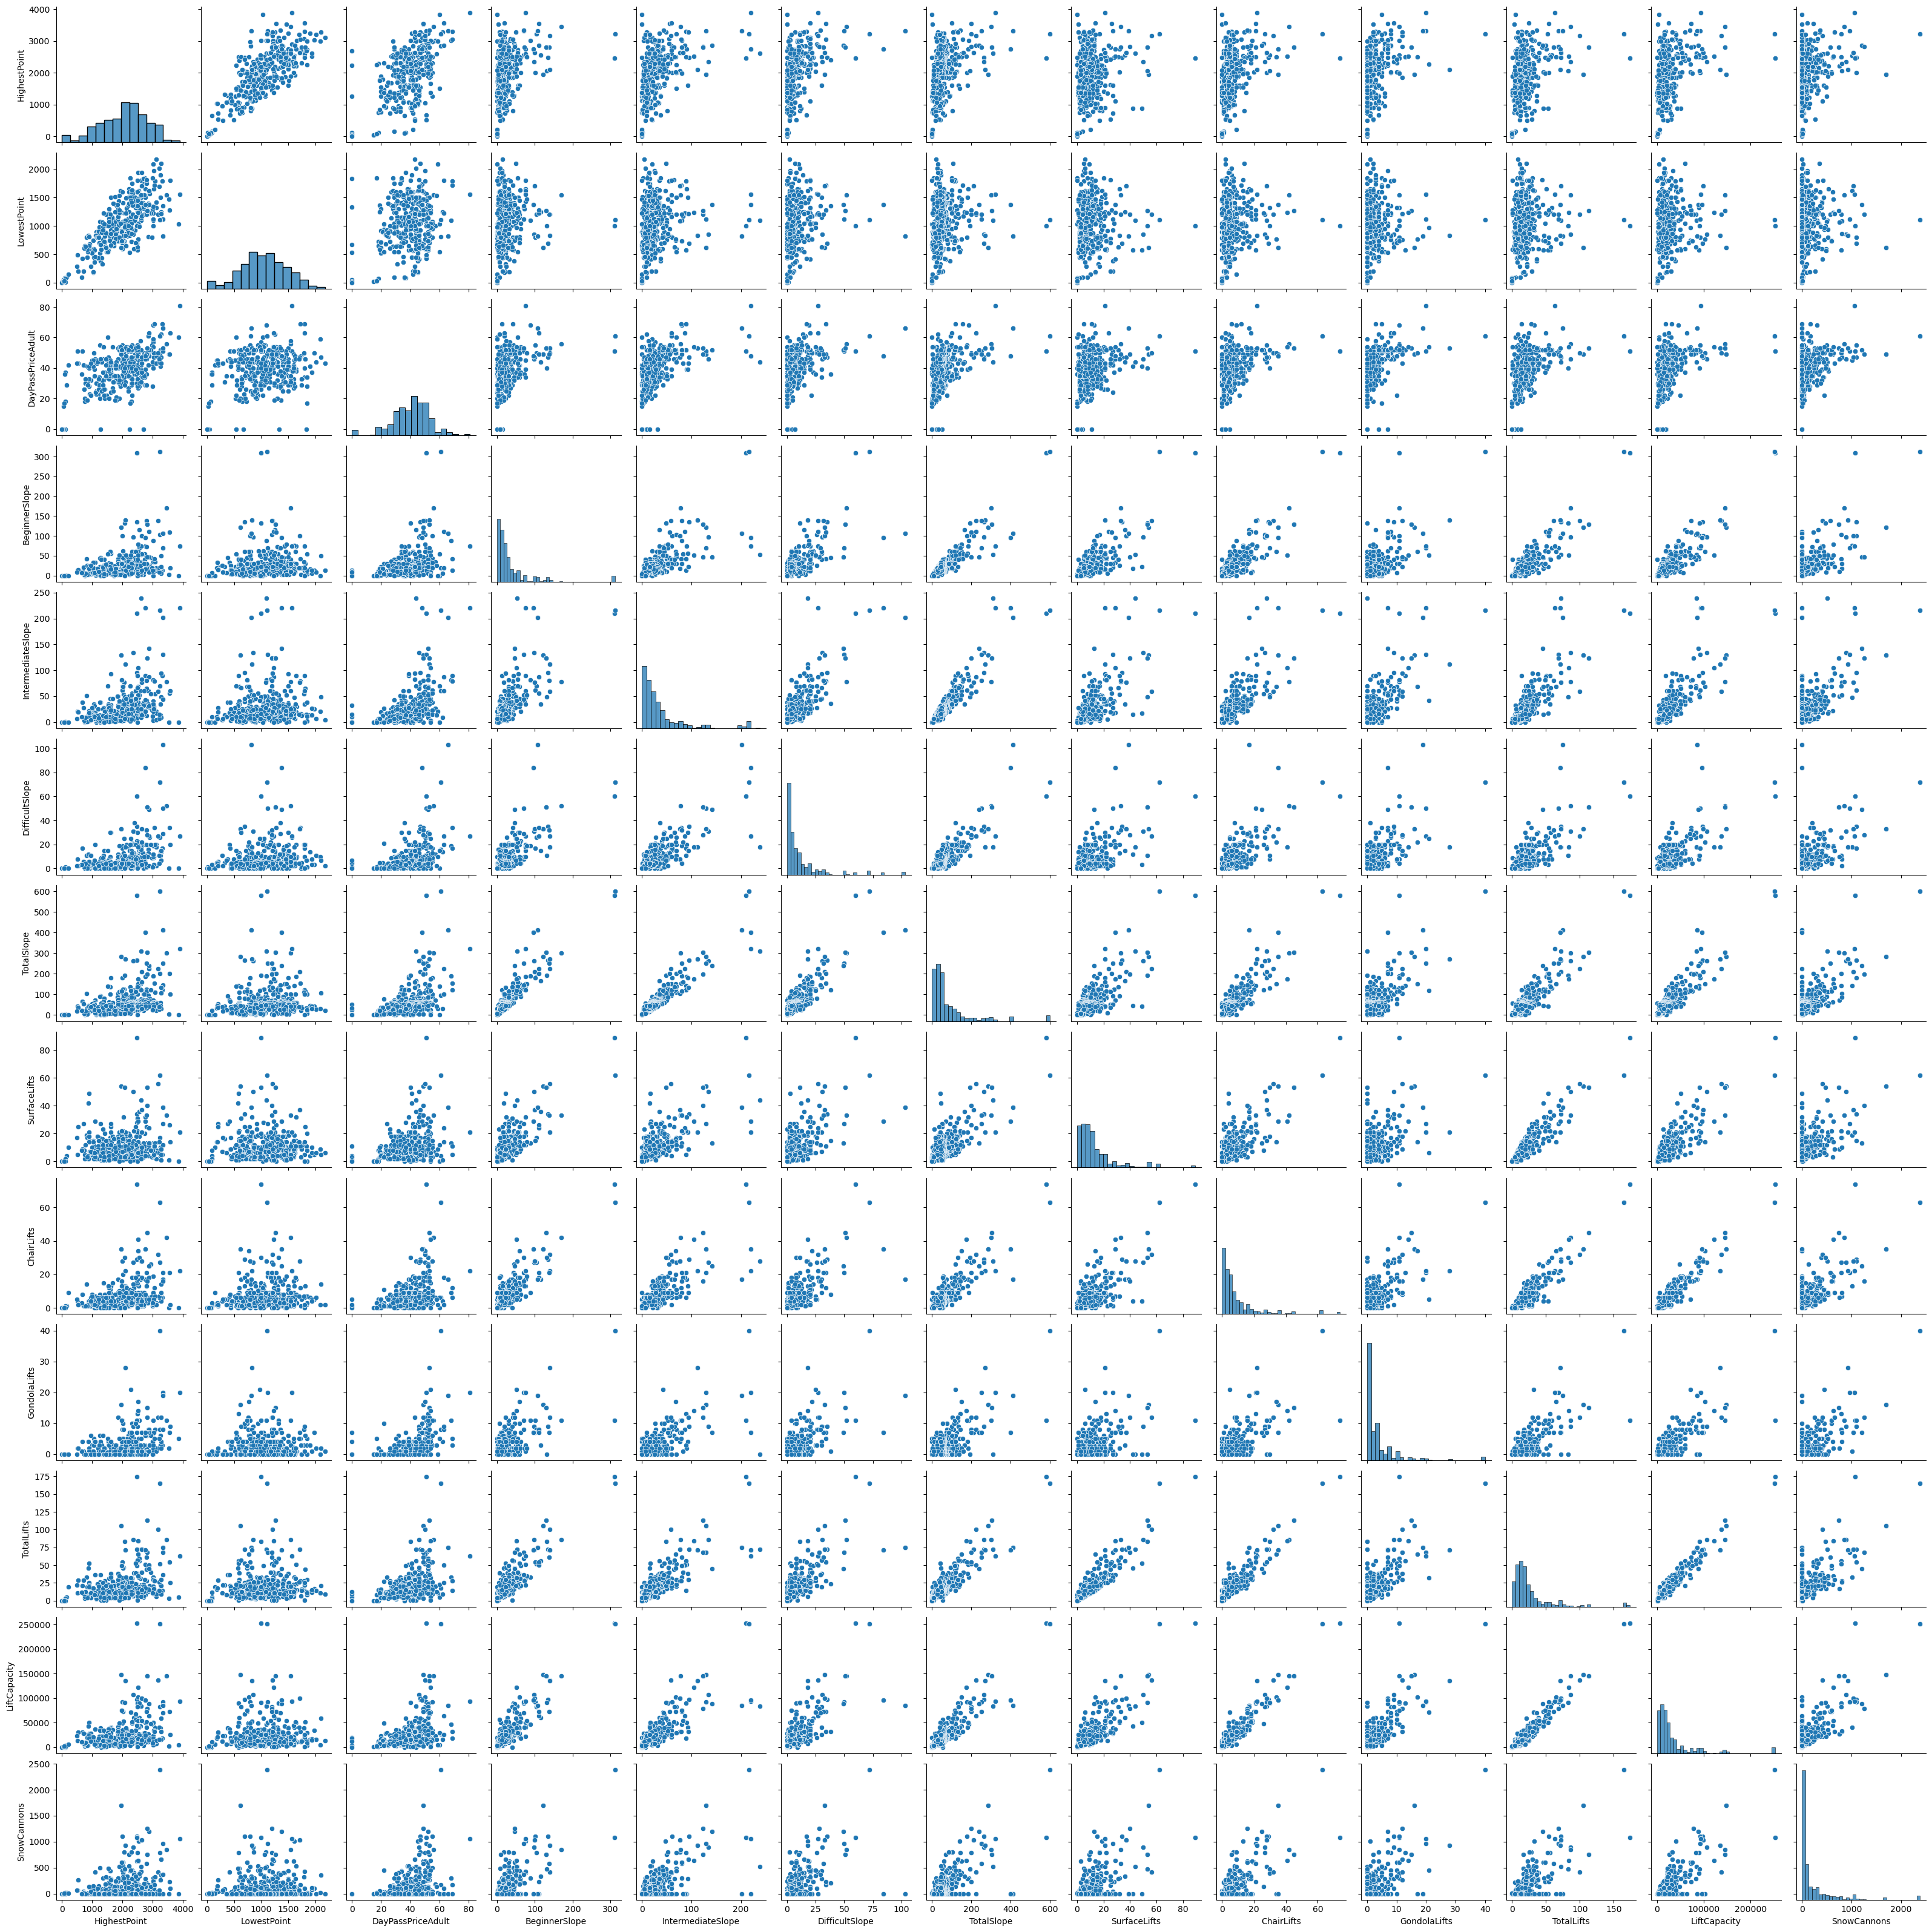

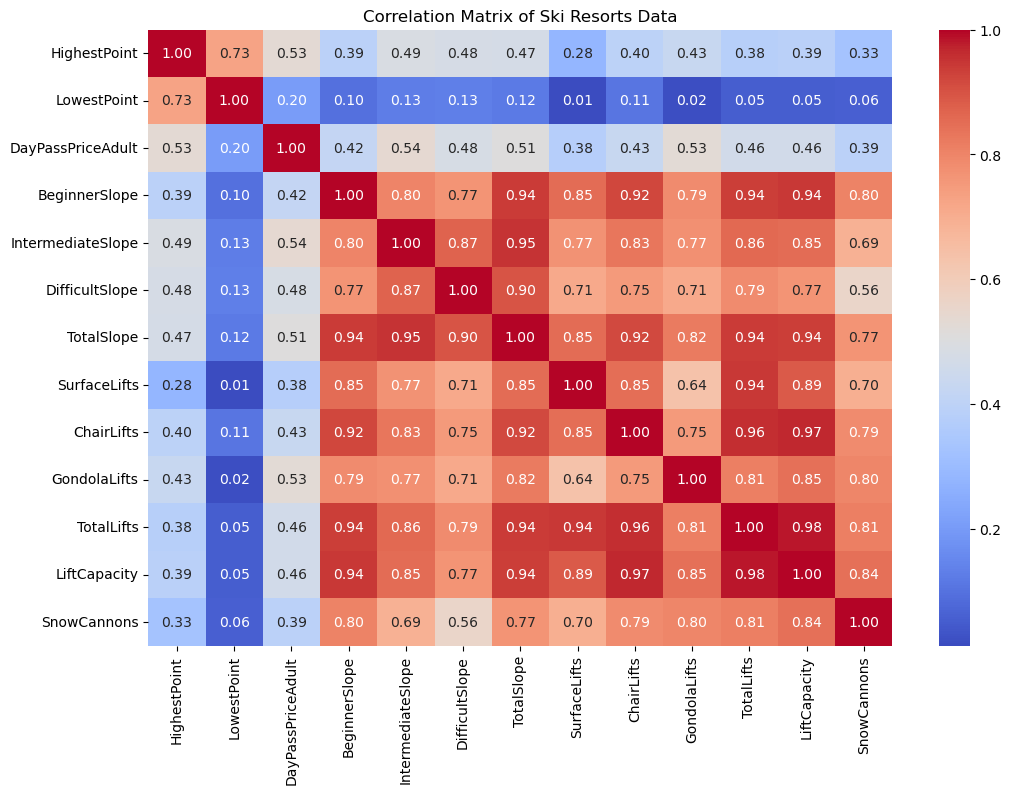

In [31]:
# Dropping the non-numerical column 'Resort' and the index column for visualization purposes
ski_resorts_numerical = ski_resorts_data.drop(['Resort', 'Unnamed: 0',], axis=1)

# Pairplot to visualize distributions and relationships
sns.pairplot(ski_resorts_numerical)
plt.show()

# Correlation matrix
corr_matrix = ski_resorts_numerical.corr(numeric_only=True)

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Ski Resorts Data")
plt.show()

## Statistical Summary
## Numeric Variables (Histograms):

#### * Elevation Points (Highest and Lowest): Varied elevations across resorts, with a relatively balanced distribution.
#### * Day Pass Price (Adult): Majority of resorts have lower prices, indicating affordability, but with some resorts at the higher end.
#### * Slope Lengths (Beginner, Intermediate, Difficult, Total): Most resorts cater to shorter slopes, hinting at a focus on casual or intermediate skiers. Few resorts offer extensive slope lengths.
#### * Lifts (Surface, Chair, Gondola, Total): A larger number of resorts have fewer lifts, which could be indicative of smaller-sized resorts.
#### * Lift Capacity & Snow Cannons: Majority have lower capacities and fewer snow cannons, suggesting many resorts are smaller or medium-sized.
## Categorical Variables (Bar Plots):

#### * Country: Shows the diversity of ski resorts across different European countries, with some countries being more represented.
#### * Snowparks: A common feature, indicating a trend towards resorts offering more than just skiing.
#### * Night Ski: A significant number of resorts offer night skiing, suggesting a preference for extended skiing hours.
#### * Bivariate Analysis
#### * Numeric Variable Pairs (Scatter Plots):

#### * Total Slope vs. Total Lifts: Positive correlation, indicating larger resorts with more slopes tend to have more lifts.
#### * Day Pass Price vs. Total Slope: The lack of a clear pattern suggests prices are influenced by factors other than just slope length.
#### * Highest Point vs. Lowest Point: Positive correlation, indicating resorts generally maintain a consistent elevation range.
#### * Lift Capacity vs. Total Lifts: Positive relationship, where resorts with more lifts have higher capacities, likely reflecting larger resort sizes.
#### * Bivariate Analysis with Hue (Scatter Plots):

#### * Total Slope vs. Total Lifts by Country: Reveals country-specific trends in resort features, like slope lengths and lift counts.
#### * Day Pass Price vs. Total Slope by Snowparks: Examines how amenities like snowparks might influence pricing relative to slope lengths.
#### * Highest Point vs. Lowest Point by Night Ski: Investigates if certain elevation profiles are more conducive to night skiing.
#### * Lift Capacity vs. Total Lifts by Country: Highlights how lift infrastructure varies across countries.
#### * Beginner Slope vs. Intermediate Slope by Snowparks: Shows the influence of snowparks on slope lengths for different skill levels.



In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



df = pd.read_csv("data/European_Ski_Resorts.csv")
# Copying the original dataset for transformations
ski_resorts_data = df.copy()

# filtering outiers out
ski_resorts_data['SlopeRange'] = ski_resorts_data['HighestPoint'] - ski_resorts_data['LowestPoint']
Q1 = ski_resorts_data['DayPassPriceAdult'].quantile(0.25)
Q3 = ski_resorts_data['DayPassPriceAdult'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
ski_resorts_data = ski_resorts_data[(ski_resorts_data['DayPassPriceAdult'] >= lower_bound) & 
                                    (ski_resorts_data['DayPassPriceAdult'] <= upper_bound)]
# One-hot encoding for categorical variables
ski_resorts_data_encoded = pd.get_dummies(ski_resorts_data, columns=['Country', 'Snowparks', 'NightSki'])
ski_resorts_data_encoded.drop(['Resort','Unnamed: 0',],axis=1)
X = ski_resorts_data_encoded.drop(['Resort','Unnamed: 0','DayPassPriceAdult'],axis=1)
y = ski_resorts_data_encoded['DayPassPriceAdult']
feature_names = ski_resorts_data_encoded.drop(['Resort', 'Unnamed: 0'], axis=1).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))


Linear Regression MSE: 1.938075262191945e+27


In [20]:
ski_resorts_data.shape

(366, 19)

## After filtering out the data,removing outliers and scaling the data, the model still does poorly.
## Require more thorough Research into overfitting in Linear Regression Models.

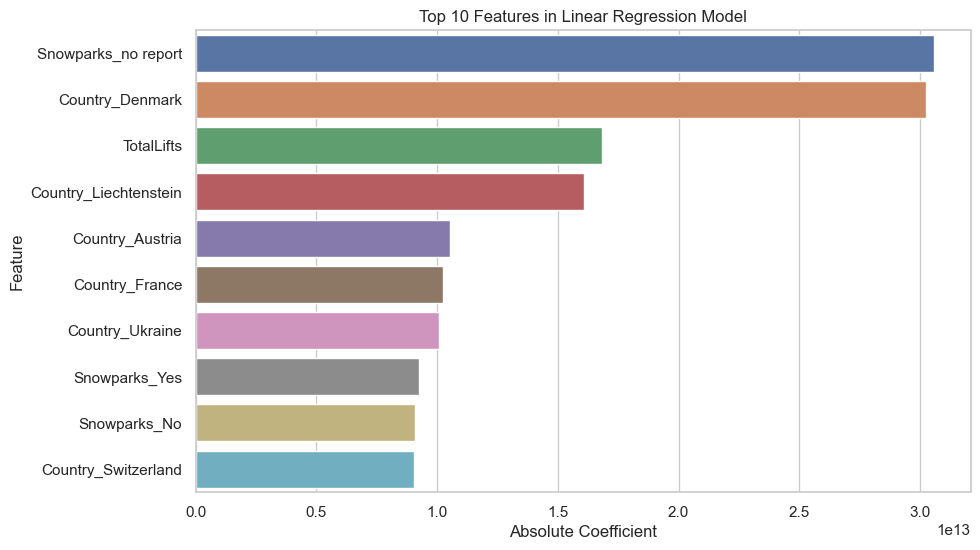

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

coefficients = linear_reg.coef_

# Create a DataFrame for feature names and their corresponding coefficients
feature_names = X.columns  # Feature names after one-hot encoding
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort and visualize
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(10), x='Abs_Coefficient', y='Feature')
plt.title('Top 10 Features in Linear Regression Model')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()


In [255]:
coef_df

Feature   Coefficient  Abs_Coefficient
24           Country_Liechtenstein -1.405195e+13     1.405195e+13
18                 Country_Denmark  7.270181e+12     7.270181e+12
41             Snowparks_no report -6.524059e+12     6.524059e+12
43                    NightSki_Yes -4.590727e+12     4.590727e+12
42                     NightSki_No -4.590727e+12     4.590727e+12
40                   Snowparks_Yes  4.246196e+12     4.246196e+12
39                    Snowparks_No  4.180734e+12     4.180734e+12
9                       TotalLifts -2.428852e+12     2.428852e+12
37                 Country_Ukraine -2.309819e+12     2.309819e+12
14                 Country_Austria -1.151528e+12     1.151528e+12
6                     SurfaceLifts  1.131454e+12     1.131454e+12
20                  Country_France -1.119195e+12     1.119195e+12
7                       ChairLifts  9.875168e+11     9.875168e+11
36             Country_Switzerland -9.870404e+11     9.870404e+11
23                   Country_Italy -8.643213e+11     8.643213e+11
21                 Country_Germany -6.644440e+11     6.644440e+11
8                     GondolaLifts  5.086112e+11     5.086112e+11
30                  Country_Serbia  4.648086e+11     4.648086e+11
27                  Country_Norway -4.375873e+11     4.375873e+11
34                   Country_Spain -3.924879e+11     3.924879e+11
35                  Country_Sweden -3.408526e+11     3.408526e+11
31                Country_Slovakia -3.115863e+11     3.115863e+11
13                 Country_Andorra -3.115863e+11     3.115863e+11
16                Country_Bulgaria -2.790770e+11     2.790770e+11
32                Country_Slovenia -2.790770e+11     2.790770e+11
38          Country_United Kingdom -2.790770e+11     2.790770e+11
33         Country_Southern Russia -2.420213e+11     2.420213e+11
19                 Country_Finland -2.420213e+11     2.420213e+11
28                  Country_Poland -1.978816e+11     1.978816e+11
17          Country_Czech Republic -1.978816e+11     1.978816e+11
29                 Country_Romania -1.978816e+11     1.978816e+11
15  Country_Bosnia and Herzegovina -1.401155e+11     1.401155e+11
22                  Country_Greece -1.401155e+11     1.401155e+11
25               Country_Lithuania -1.401155e+11     1.401155e+11
26             Country_Netherlands -1.401155e+11     1.401155e+11
0                     HighestPoint  5.838911e+09     5.838911e+09
12                      SlopeRange -4.233251e+09     4.233251e+09
1                      LowestPoint -3.219562e+09     3.219562e+09
5                       TotalSlope  4.200591e+01     4.200591e+01
2                    BeginnerSlope -2.190968e+01     2.190968e+01
3                IntermediateSlope -1.706200e+01     1.706200e+01
4                   DifficultSlope -6.711118e+00     6.711118e+00
10                    LiftCapacity  3.658123e+00     3.658123e+00
11                     SnowCannons -7.347095e-01     7.347095e-01

In [239]:
# Top 10 influential Columns
coef_df.head(10)

Feature   Coefficient  Abs_Coefficient
24  Country_Liechtenstein -1.405195e+13     1.405195e+13
18        Country_Denmark  7.270181e+12     7.270181e+12
41    Snowparks_no report -6.524059e+12     6.524059e+12
43           NightSki_Yes -4.590727e+12     4.590727e+12
42            NightSki_No -4.590727e+12     4.590727e+12
40          Snowparks_Yes  4.246196e+12     4.246196e+12
39           Snowparks_No  4.180734e+12     4.180734e+12
9              TotalLifts -2.428852e+12     2.428852e+12
37        Country_Ukraine -2.309819e+12     2.309819e+12
14        Country_Austria -1.151528e+12     1.151528e+12

In [240]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Splitting Dataset into training and testing sets
#X = ski_resorts_data.drop(['DayPassPriceAdult', 'Resort', 'Unnamed: 0','Country'], axis=1)
#y = ski_resorts_data['DayPassPriceAdult']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_RfR = RandomForestRegressor()
model_RfR.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_RfR.predict(X_test)

# Calculating MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 3.9483783783783792
Mean Squared Error (MSE): 28.135691891891895
Root Mean Squared Error (RMSE): 5.304308804348771


Text(0, 0.5, 'Feature')

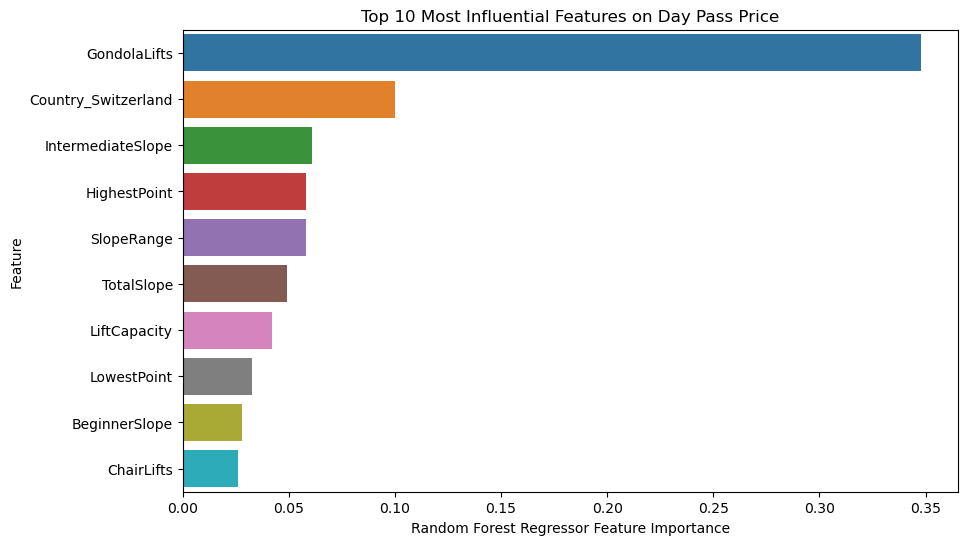

In [241]:
importances = model_RfR.feature_importances_

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sorting the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Most Influential Features on Day Pass Price')
plt.xlabel('Random Forest Regressor Feature Importance')
plt.ylabel('Feature')


In [242]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
print("Decision Tree Regression MSE:", mean_squared_error(y_test, y_pred))


Decision Tree Regression MSE: 71.02702702702703


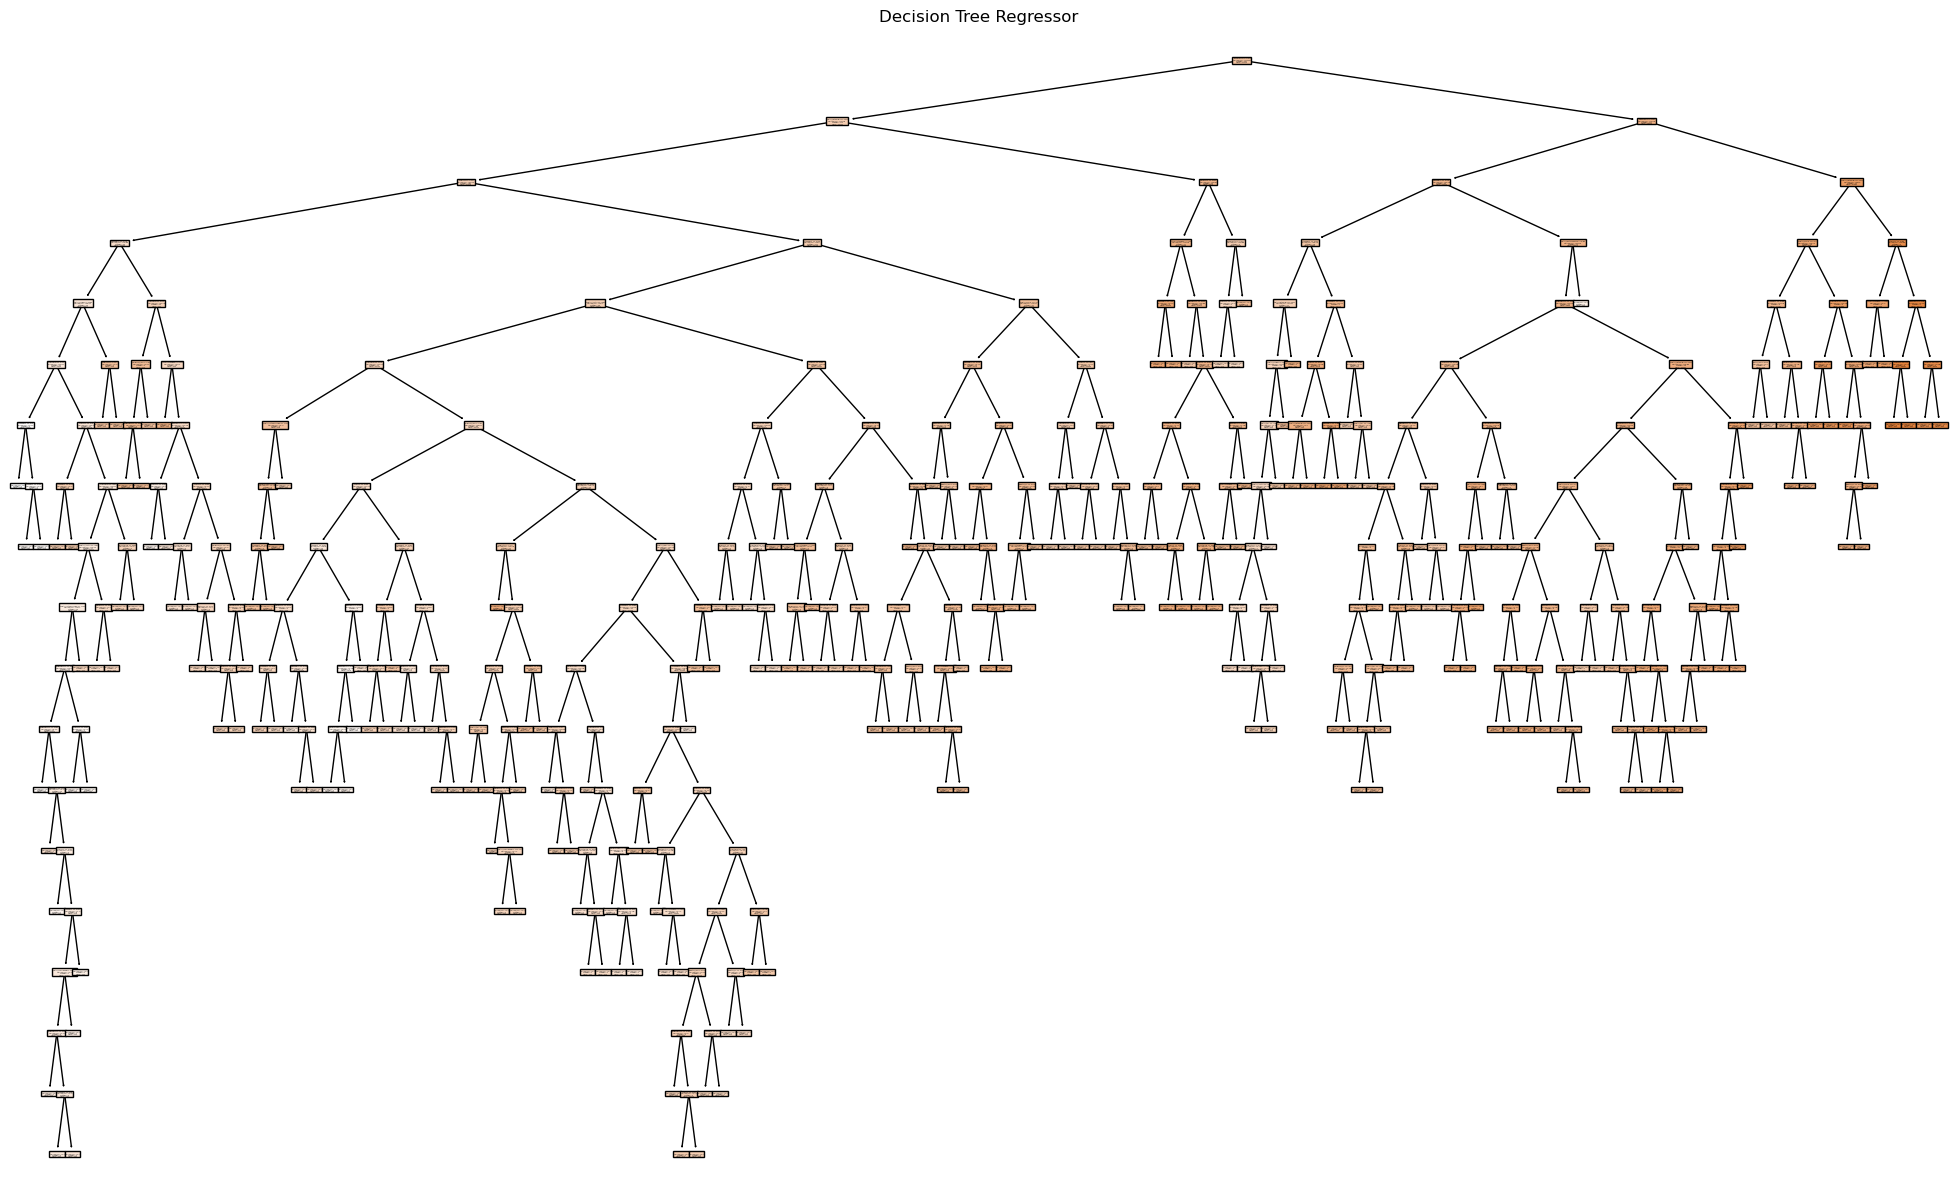

In [243]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 15))  # Set the figure size as needed
plot_tree(tree_reg, filled=True, feature_names=list(X.columns))  # 'X_encoded' should be your encoded feature matrix
plt.title("Decision Tree Regressor")
plt.show()

In [244]:
from sklearn.linear_model import ElasticNet

elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_reg.fit(X_train, y_train)
y_pred = elastic_net_reg.predict(X_test)
print("Elastic Net Regression MSE:", mean_squared_error(y_test, y_pred))


Elastic Net Regression MSE: 30.854962299677354


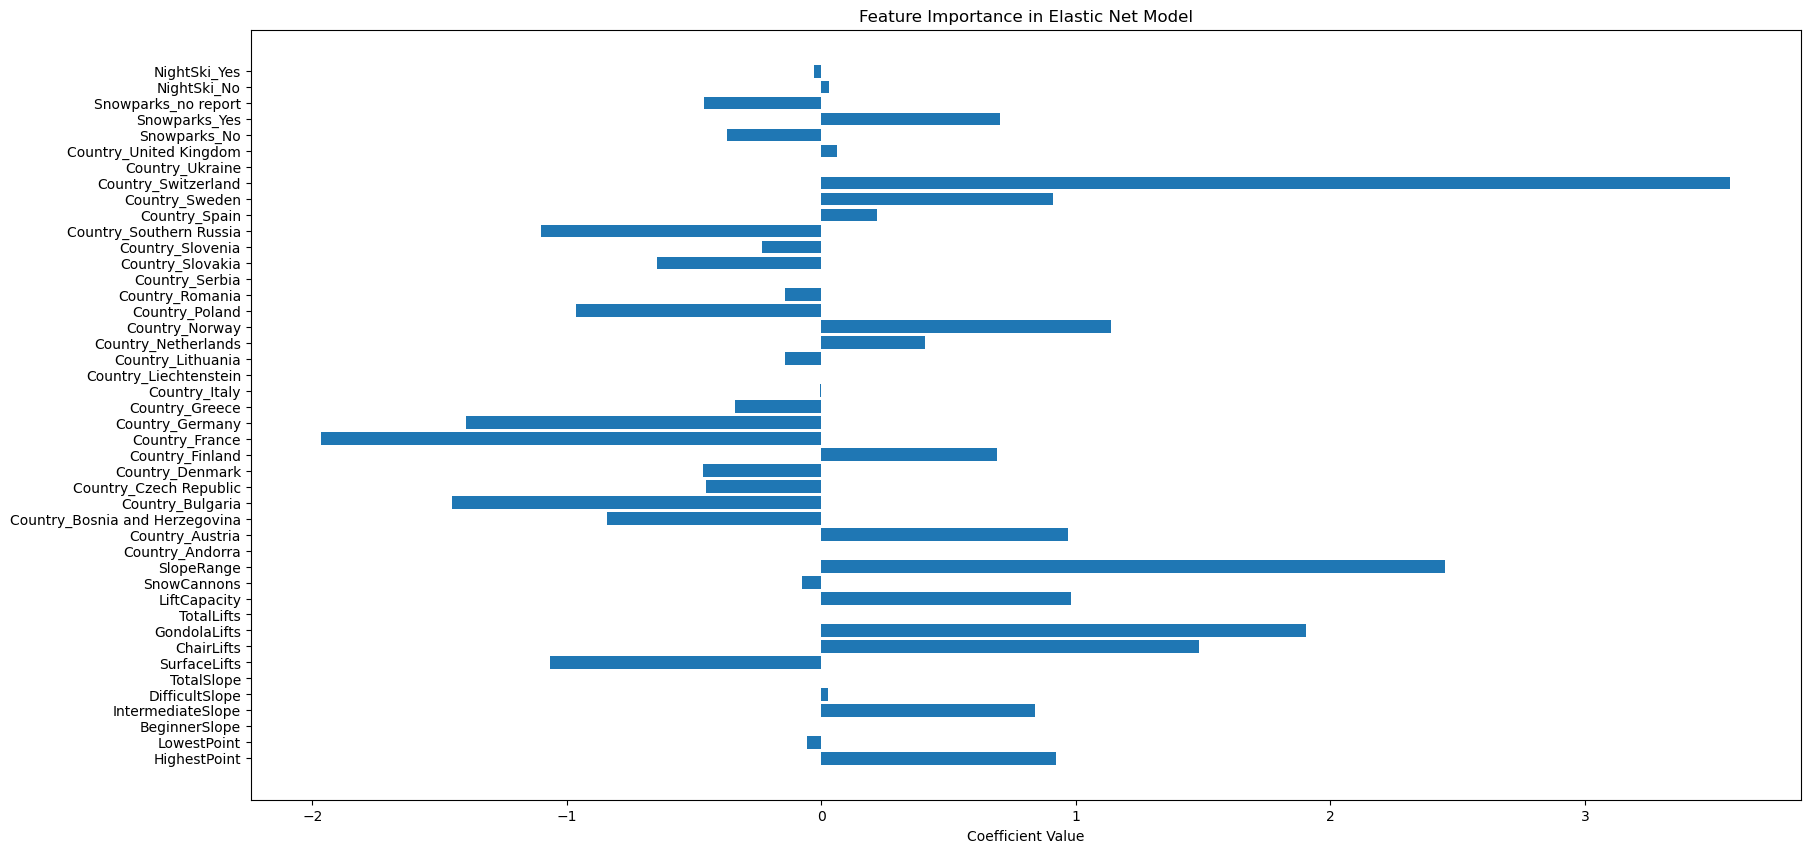

In [245]:
# Extracting coefficients
elastic_net_coef = elastic_net_reg.coef_

# Plotting
plt.figure(figsize=(20, 10))
plt.barh(range(len(elastic_net_coef)), elastic_net_coef)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Elastic Net Model')
plt.show()

In [246]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_reg = GradientBoostingRegressor()
gradient_boosting_reg.fit(X_train, y_train)
y_pred = gradient_boosting_reg.predict(X_test)
print("Gradient Boosting Regression MSE:", mean_squared_error(y_test, y_pred))


Gradient Boosting Regression MSE: 30.476002535148996


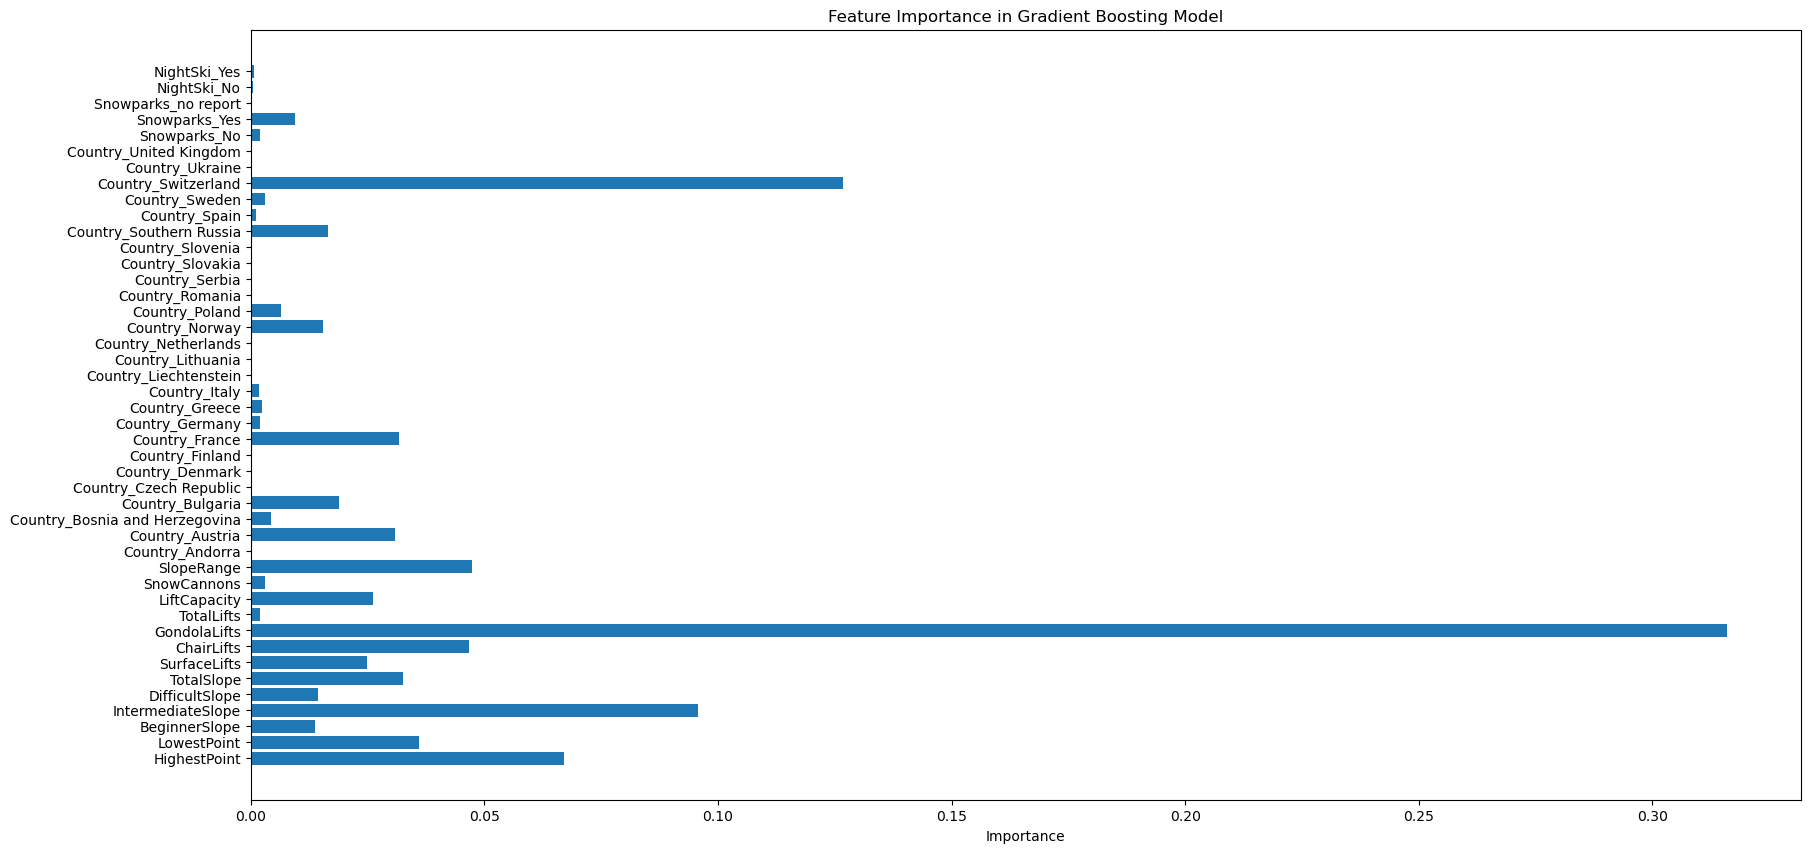

In [247]:
# Extracting feature importance
gbr_feature_importance = gradient_boosting_reg.feature_importances_

# Plotting
plt.figure(figsize=(20, 10))
plt.barh(range(len(gbr_feature_importance)), gbr_feature_importance)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Importance')
plt.title('Feature Importance in Gradient Boosting Model')
plt.show()

In [248]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)
y_pred = svr_reg.predict(X_test)
print("Support Vector Regression MSE:", mean_squared_error(y_test, y_pred))


Support Vector Regression MSE: 54.11804747799877


In [249]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred))


Ridge Regression MSE: 32.546684272002544


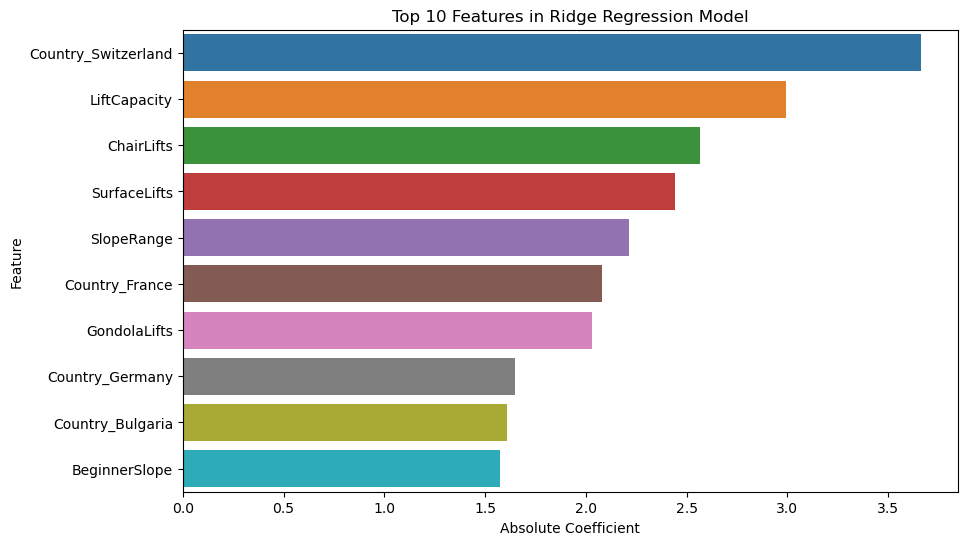

In [250]:
# Extracting coefficients
#feature_names = X.columns
ridge_coef = ridge_reg.coef_
# Creating a DataFrame for feature names and their corresponding coefficients
ridge_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': ridge_coef})

# Sorting the features by the absolute value of their coefficients
ridge_coef_df['Abs_Coefficient'] = ridge_coef_df['Coefficient'].abs()
ridge_coef_df = ridge_coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=ridge_coef_df.head(10), x='Abs_Coefficient', y='Feature')
plt.title('Top 10 Features in Ridge Regression Model')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()


In [251]:
print(len(feature_names))
print(len(ridge_coef))

44
44


In [252]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred))


Lasso Regression MSE: 31.155981719389988


LowestPoint
BeginnerSlope
DifficultSlope
TotalSlope
TotalLifts
LiftCapacity
SnowCannons
Country_Andorra
Country_Italy
Country_Liechtenstein
Country_Serbia
Country_Ukraine
Snowparks_No
NightSki_No
NightSki_Yes


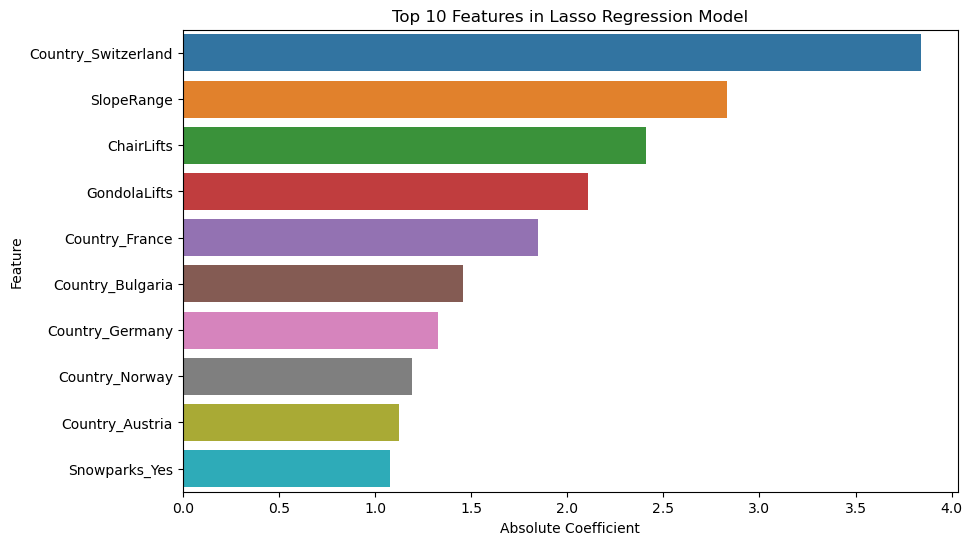

In [253]:
# Extracting coefficients
lasso_coef = lasso_reg.coef_
# Creating a DataFrame for feature names and their corresponding coefficients
# Check which features have a coefficient of zero
for feature, coef in zip(feature_names, lasso_coef):
    if coef == 0:
        print(feature)
    
lasso_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coef})

# Sorting the features by the absolute value of their coefficients
lasso_coef_df['Abs_Coefficient'] = lasso_coef_df['Coefficient'].abs()
lasso_coef_df = lasso_coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=lasso_coef_df.head(10), x='Abs_Coefficient', y='Feature')
plt.title('Top 10 Features in Lasso Regression Model')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()


## The Print statement above the visualization shows what co-effecients are being reduced to 0.

In [254]:
print(len(lasso_coef))
print(len(feature_names))

44
44


### Random Forest Performed Decently but we should explore more with different models and methods.
### Lets re-run this regressor with the Data scaled and Categorical variables dealt with.